# Plot main figures for my postdoc paper 1
2025.2.14
Mu-Ting Chien

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/barnes-engr-scratch1/mchien/Function/')
import mjo_mean_state_diagnostics_uw as MJO
import atmosphere_general as ATM
import cmaps
import os

In [2]:
DIR = '/barnes-engr-scratch1/mchien/'
fig_dir = DIR + 'figure/paper1_fig/'
fig_dir_supplement = DIR + 'figure/paper1_fig/supplement/'
os.makedirs(fig_dir_supplement, exist_ok=True)

file_dir_multi_yr = DIR + 'data_output/ace2/ace2_output/10yr/'
dir_in_era5_TCGI = DIR + 'data_output/ERA5_TCGI/' #(NOT USED FOR NOW)
dir_in_ace2_TCGI = DIR + 'data_output/ace2/ace2_output/repeat_2001-2010/'
latmax = 30
sub_dir = list(['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010'])
nsub    = np.size(sub_dir)


In [3]:
# Define basin
basin_list    = list(['NI','NWPAC','NEPAC','NATL','SI','SPAC'])
basin_long_list = list(['North IO','North WestPac','North EastPac','North Atl','South IO','South Pac'])
basin_lon_min = np.array([45, 105, 180, 265, 35, 135])
basin_lon_max = np.array([105, 180, 265, 357.5, 135, 270])
latmax = 30 #25 is not used, use 30
basin_lat_min = np.array([0,    0,    0,  0,  -latmax, -latmax])
basin_lat_max = np.array([latmax,  latmax, latmax, latmax,    0, 0])
nbasin        = np.size(basin_list)

# Figure 5: Scatter plot between TC genesis and TCGI for each individual month for each year

In [10]:
# Load TC genesis each month for each year
data = np.load(file_dir_multi_yr + 'TC_genesis_number_yr_month_basin_ace2_era5-1deg_'+str(latmax)+'SN_2001-2010.npz')
TC_genesis_mon_yr_basin_ace2 = data['TC_genesis_mon_yr_basin_ace2']
TC_genesis_mon_yr_basin_era5 = data['TC_genesis_mon_yr_basin_era5']

# Load TCGI
data = np.load(file_dir_multi_yr+'TCGI_ace2_era5_2001-2010_month_yr_basin.npz')
TCGI_monthly_mon_yr_basin_era5 = data['TCGI_monthly_mon_yr_basin_era5'] #()
TCGI_monthly_mon_yr_basin_ace2 = data['TCGI_monthly_mon_yr_basin_ace2']
basin_list                     = data['basin']
nbasin                         = np.size(basin_list)

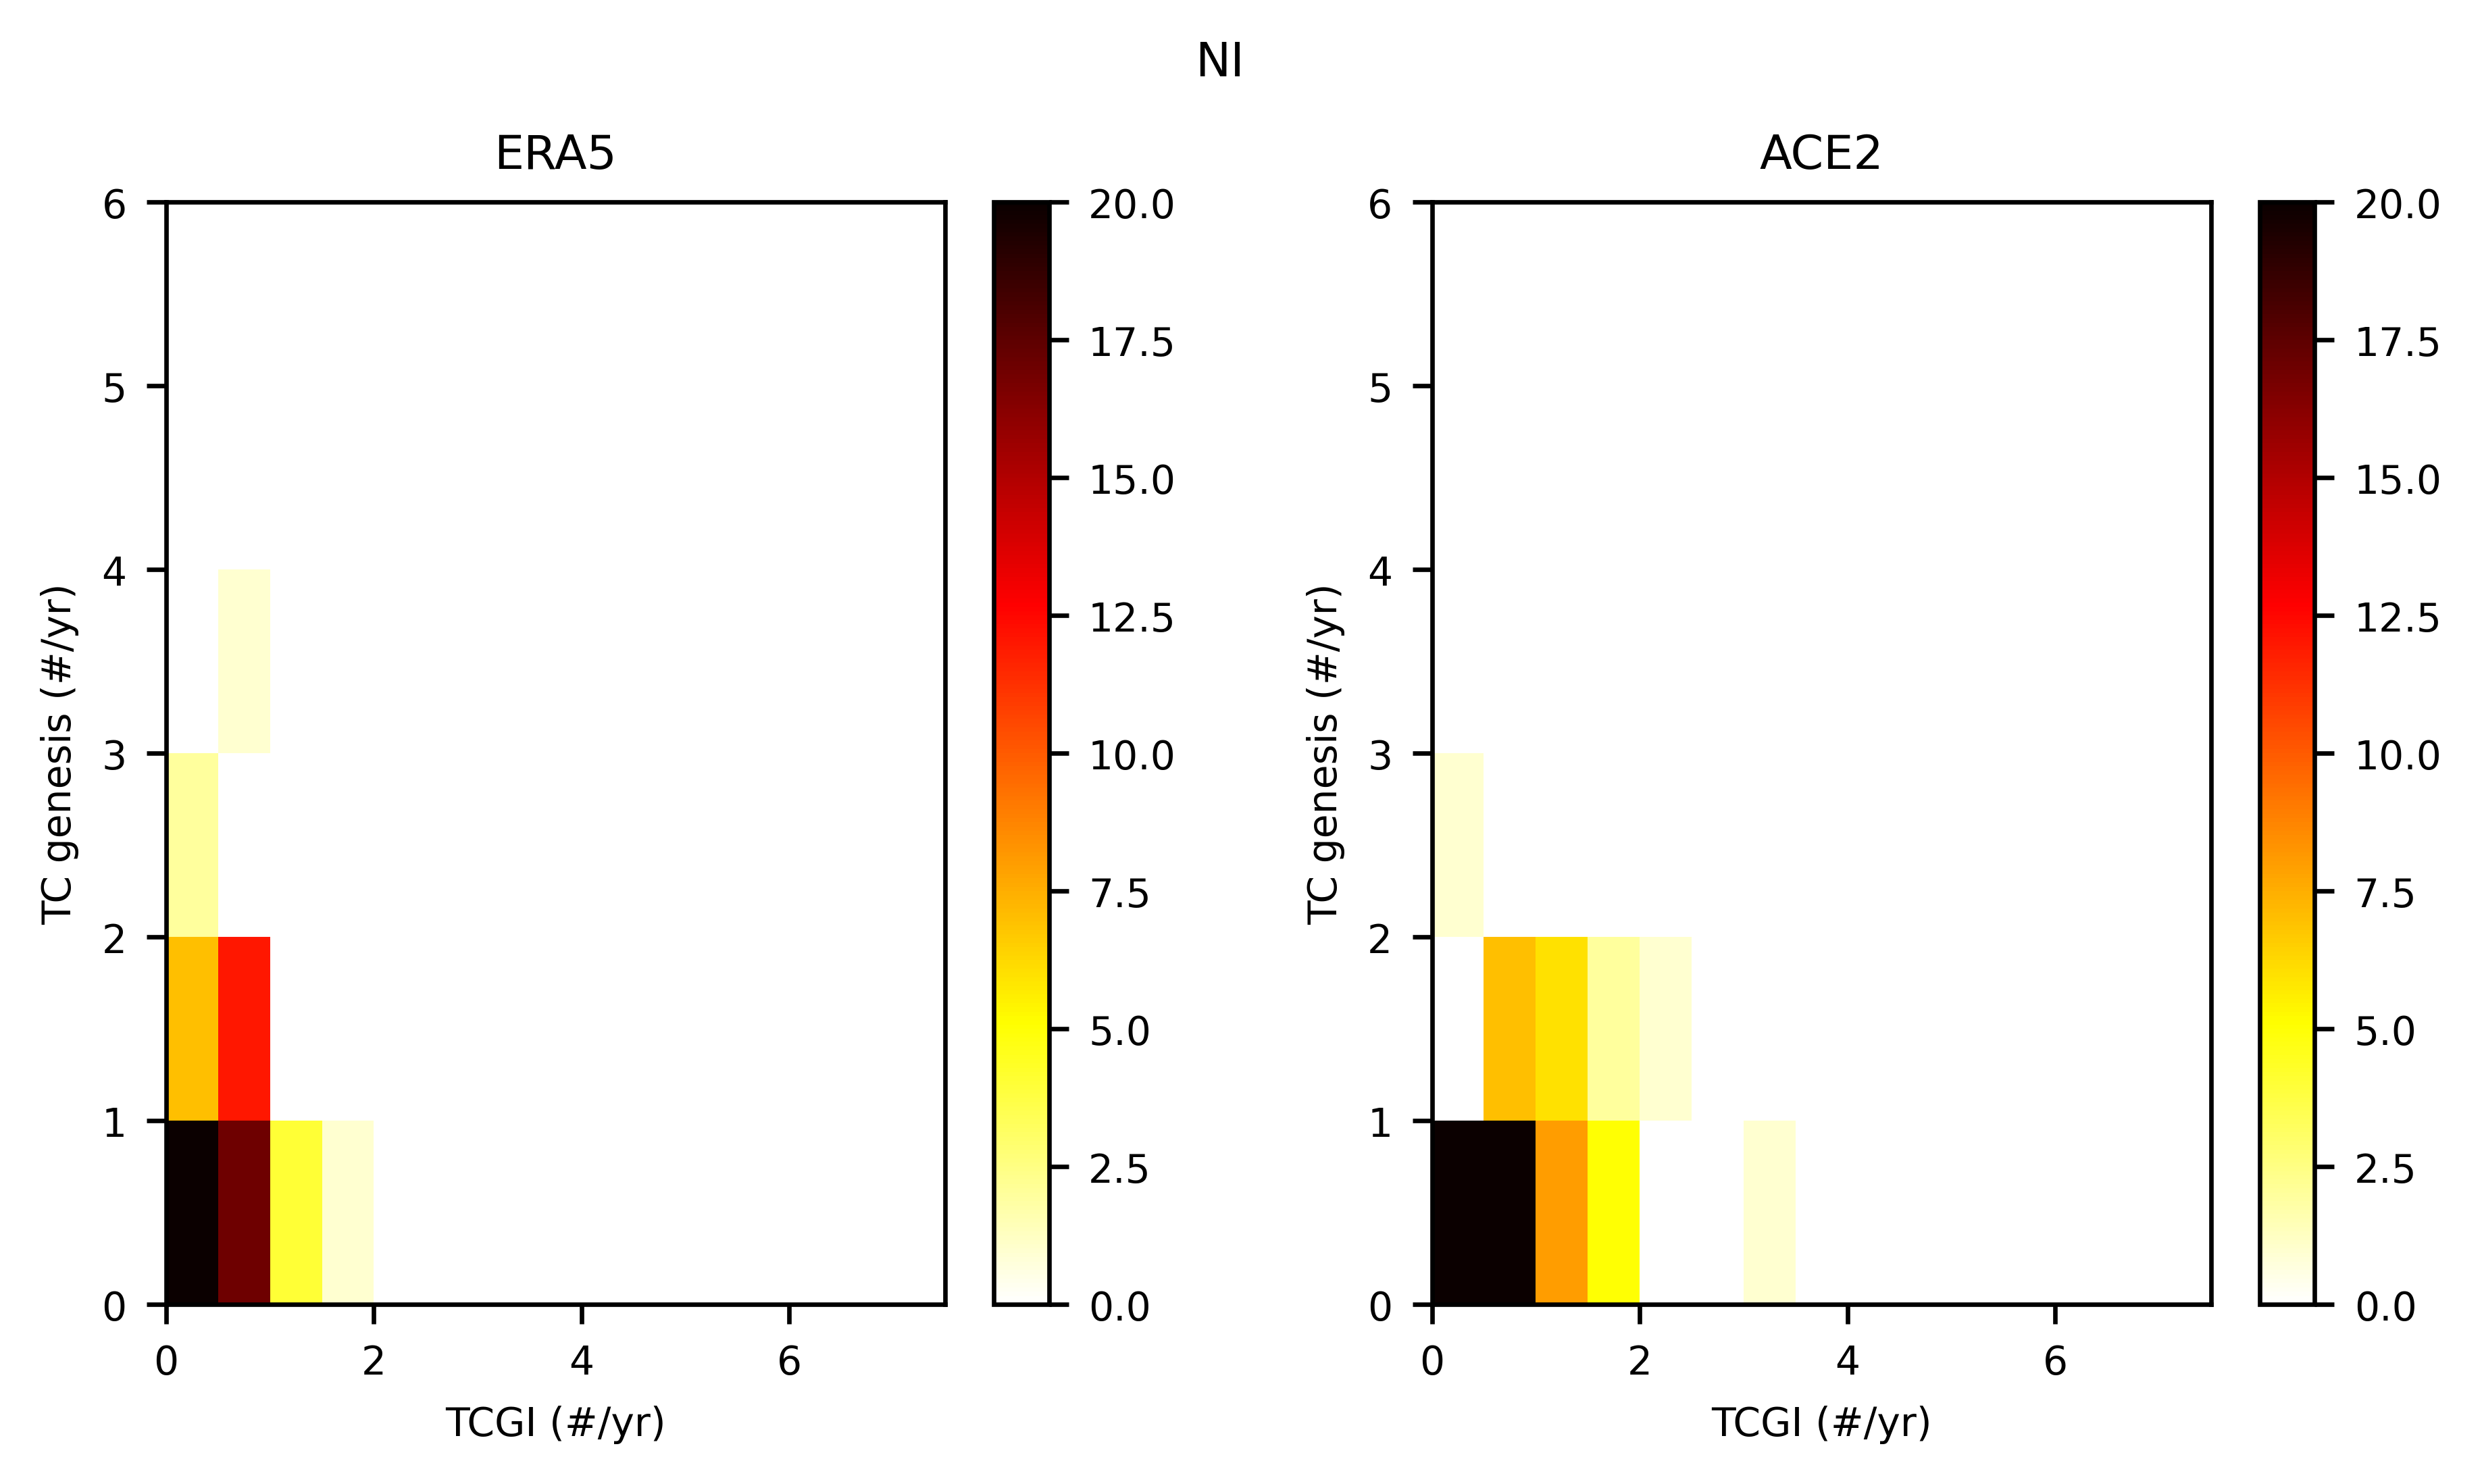

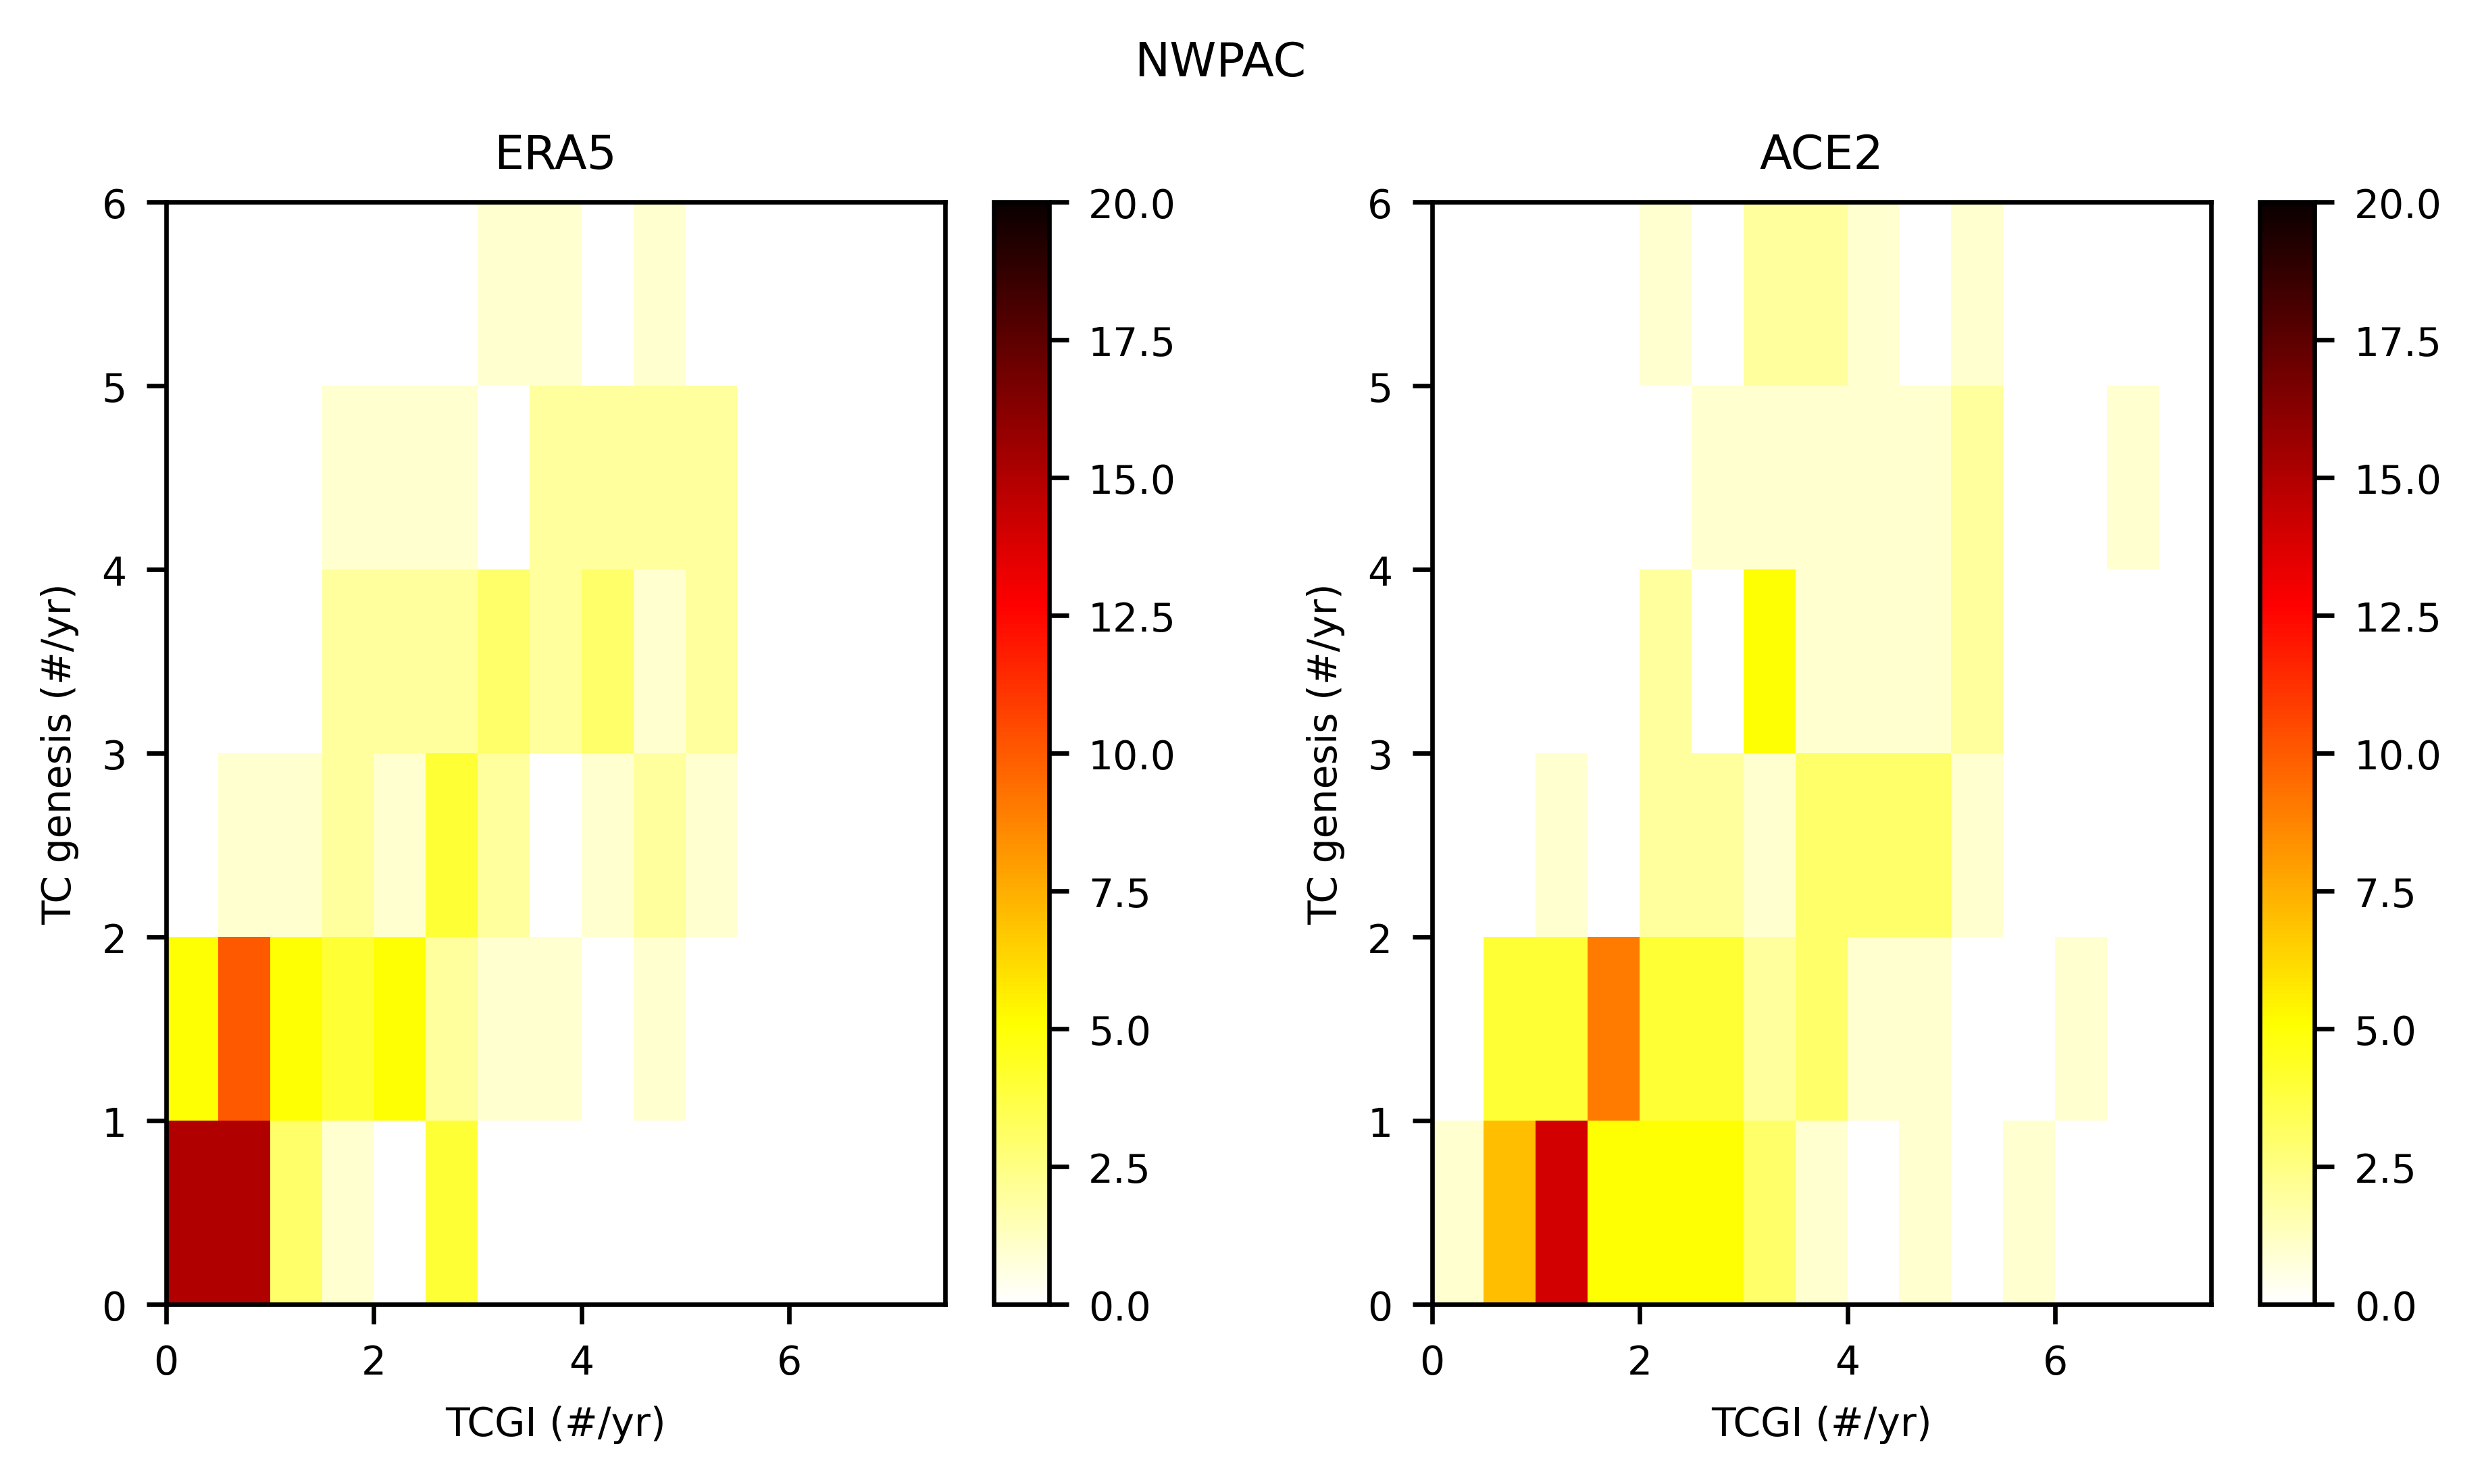

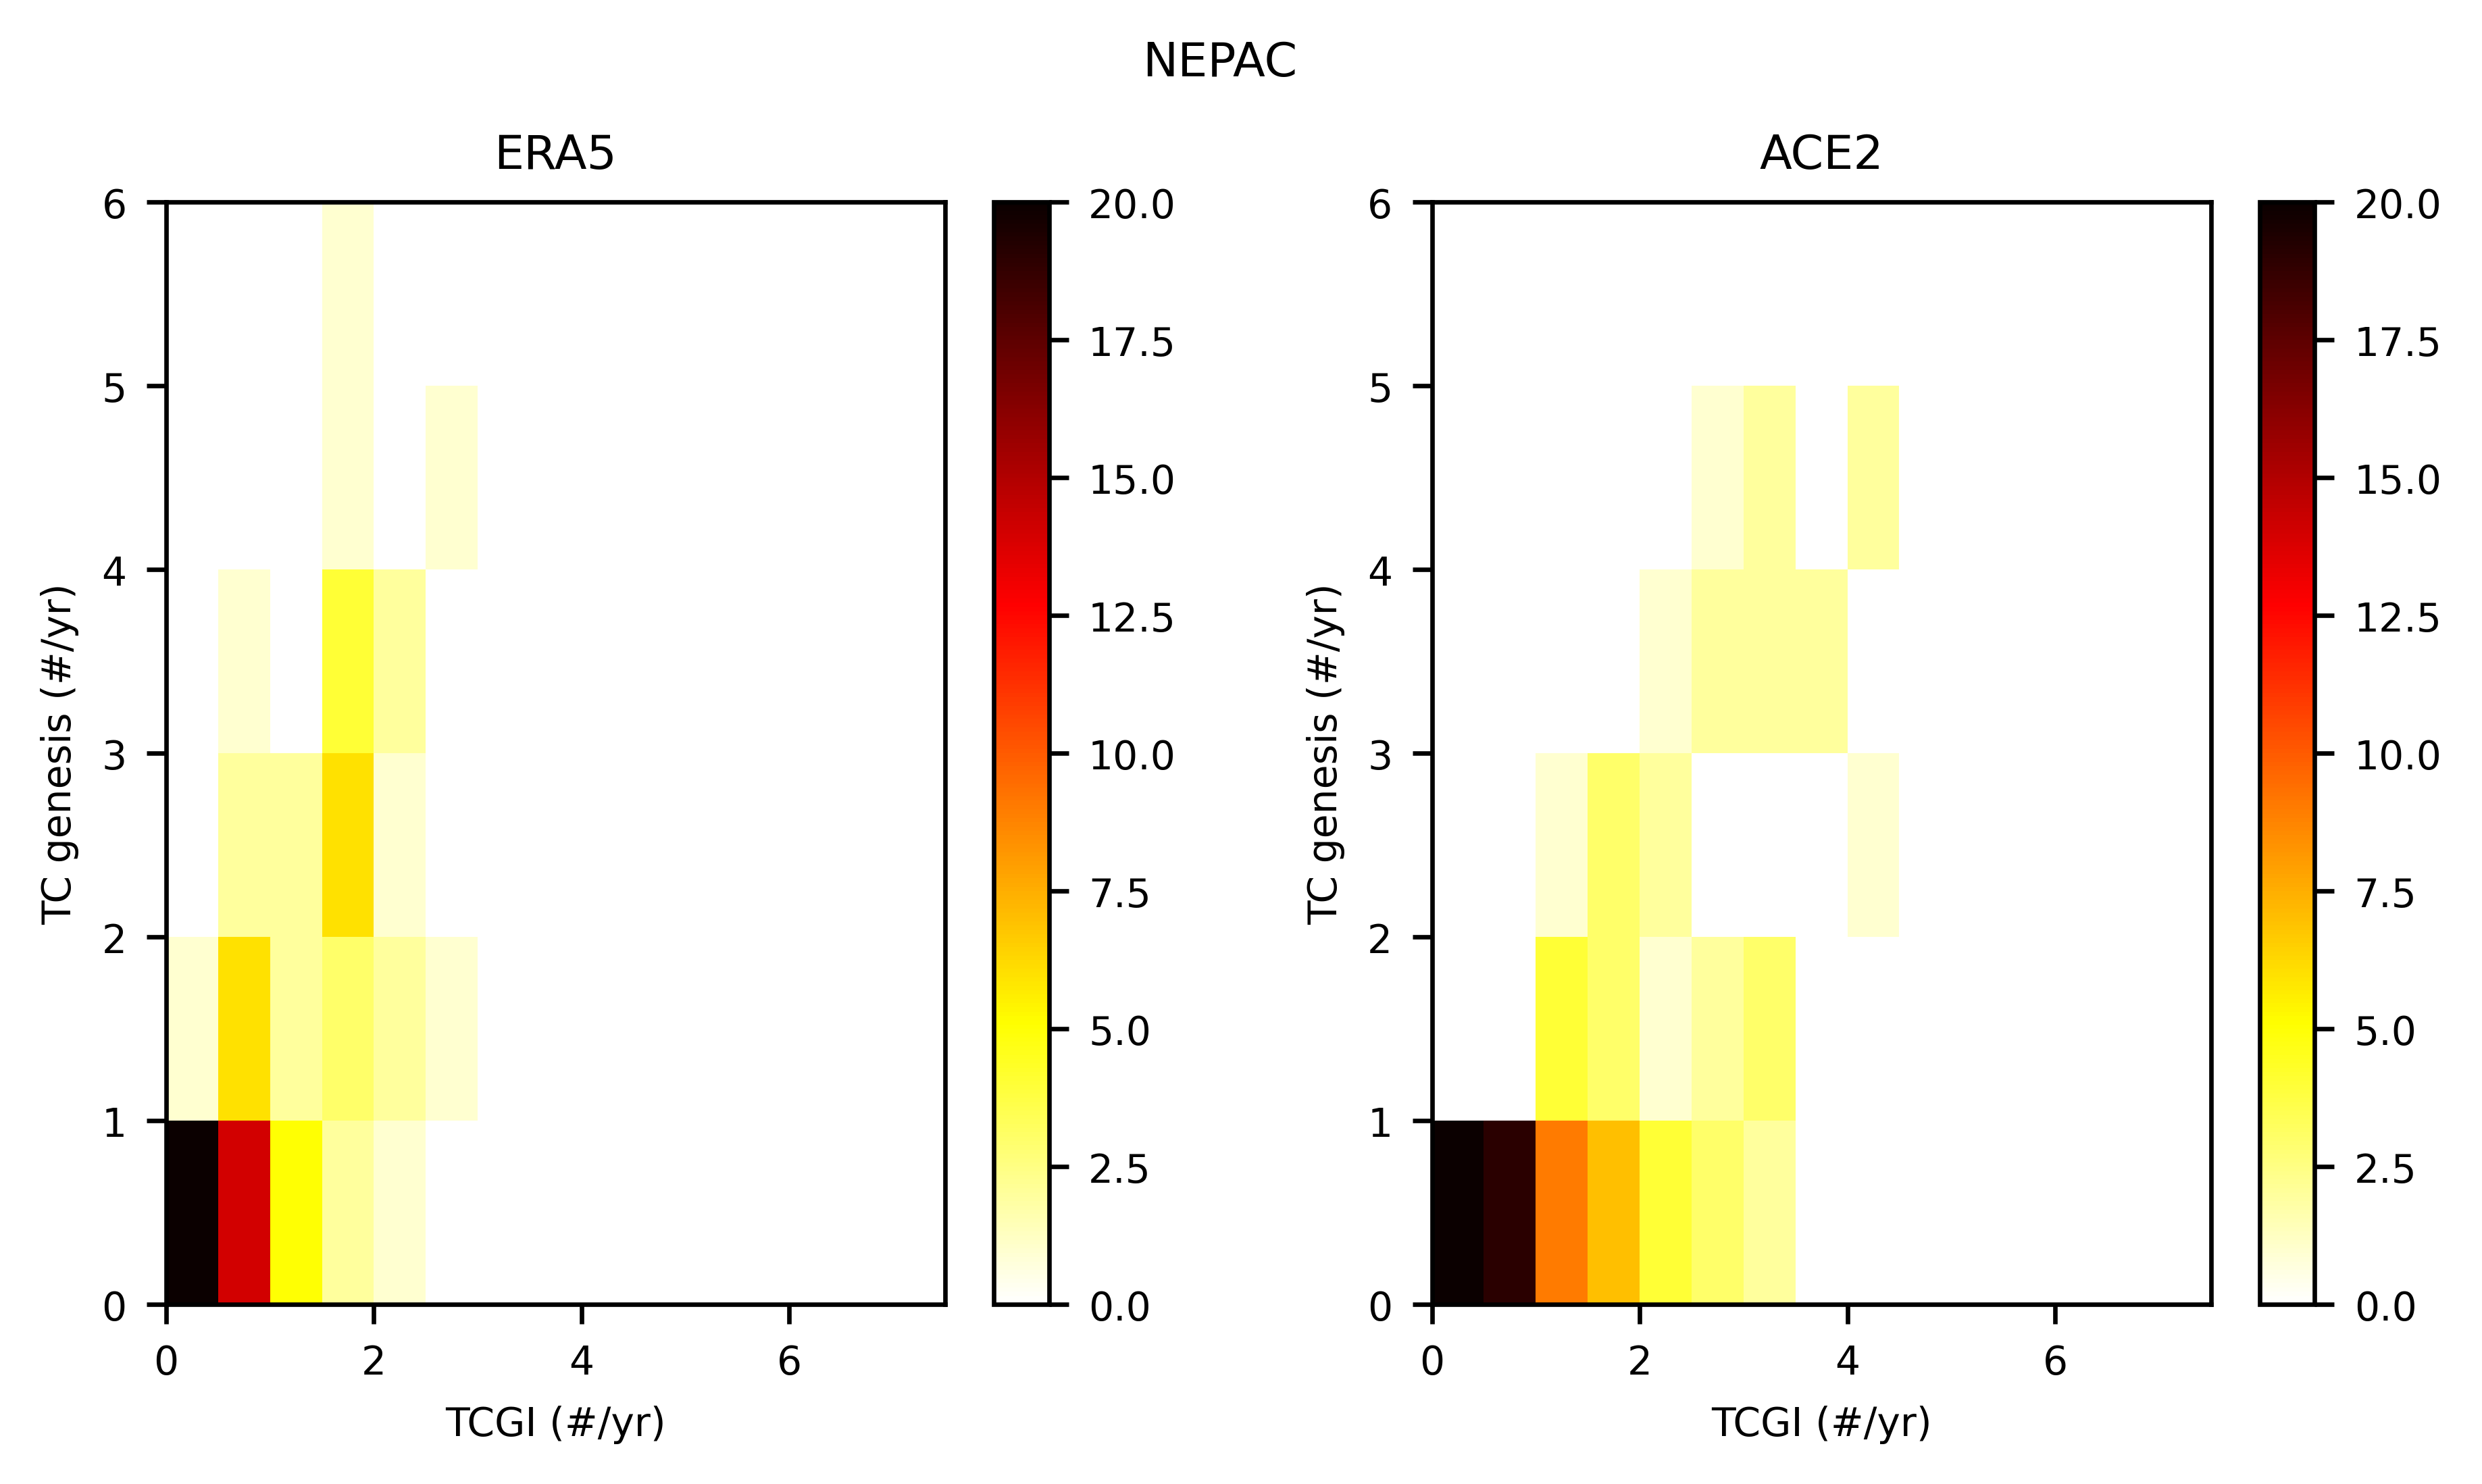

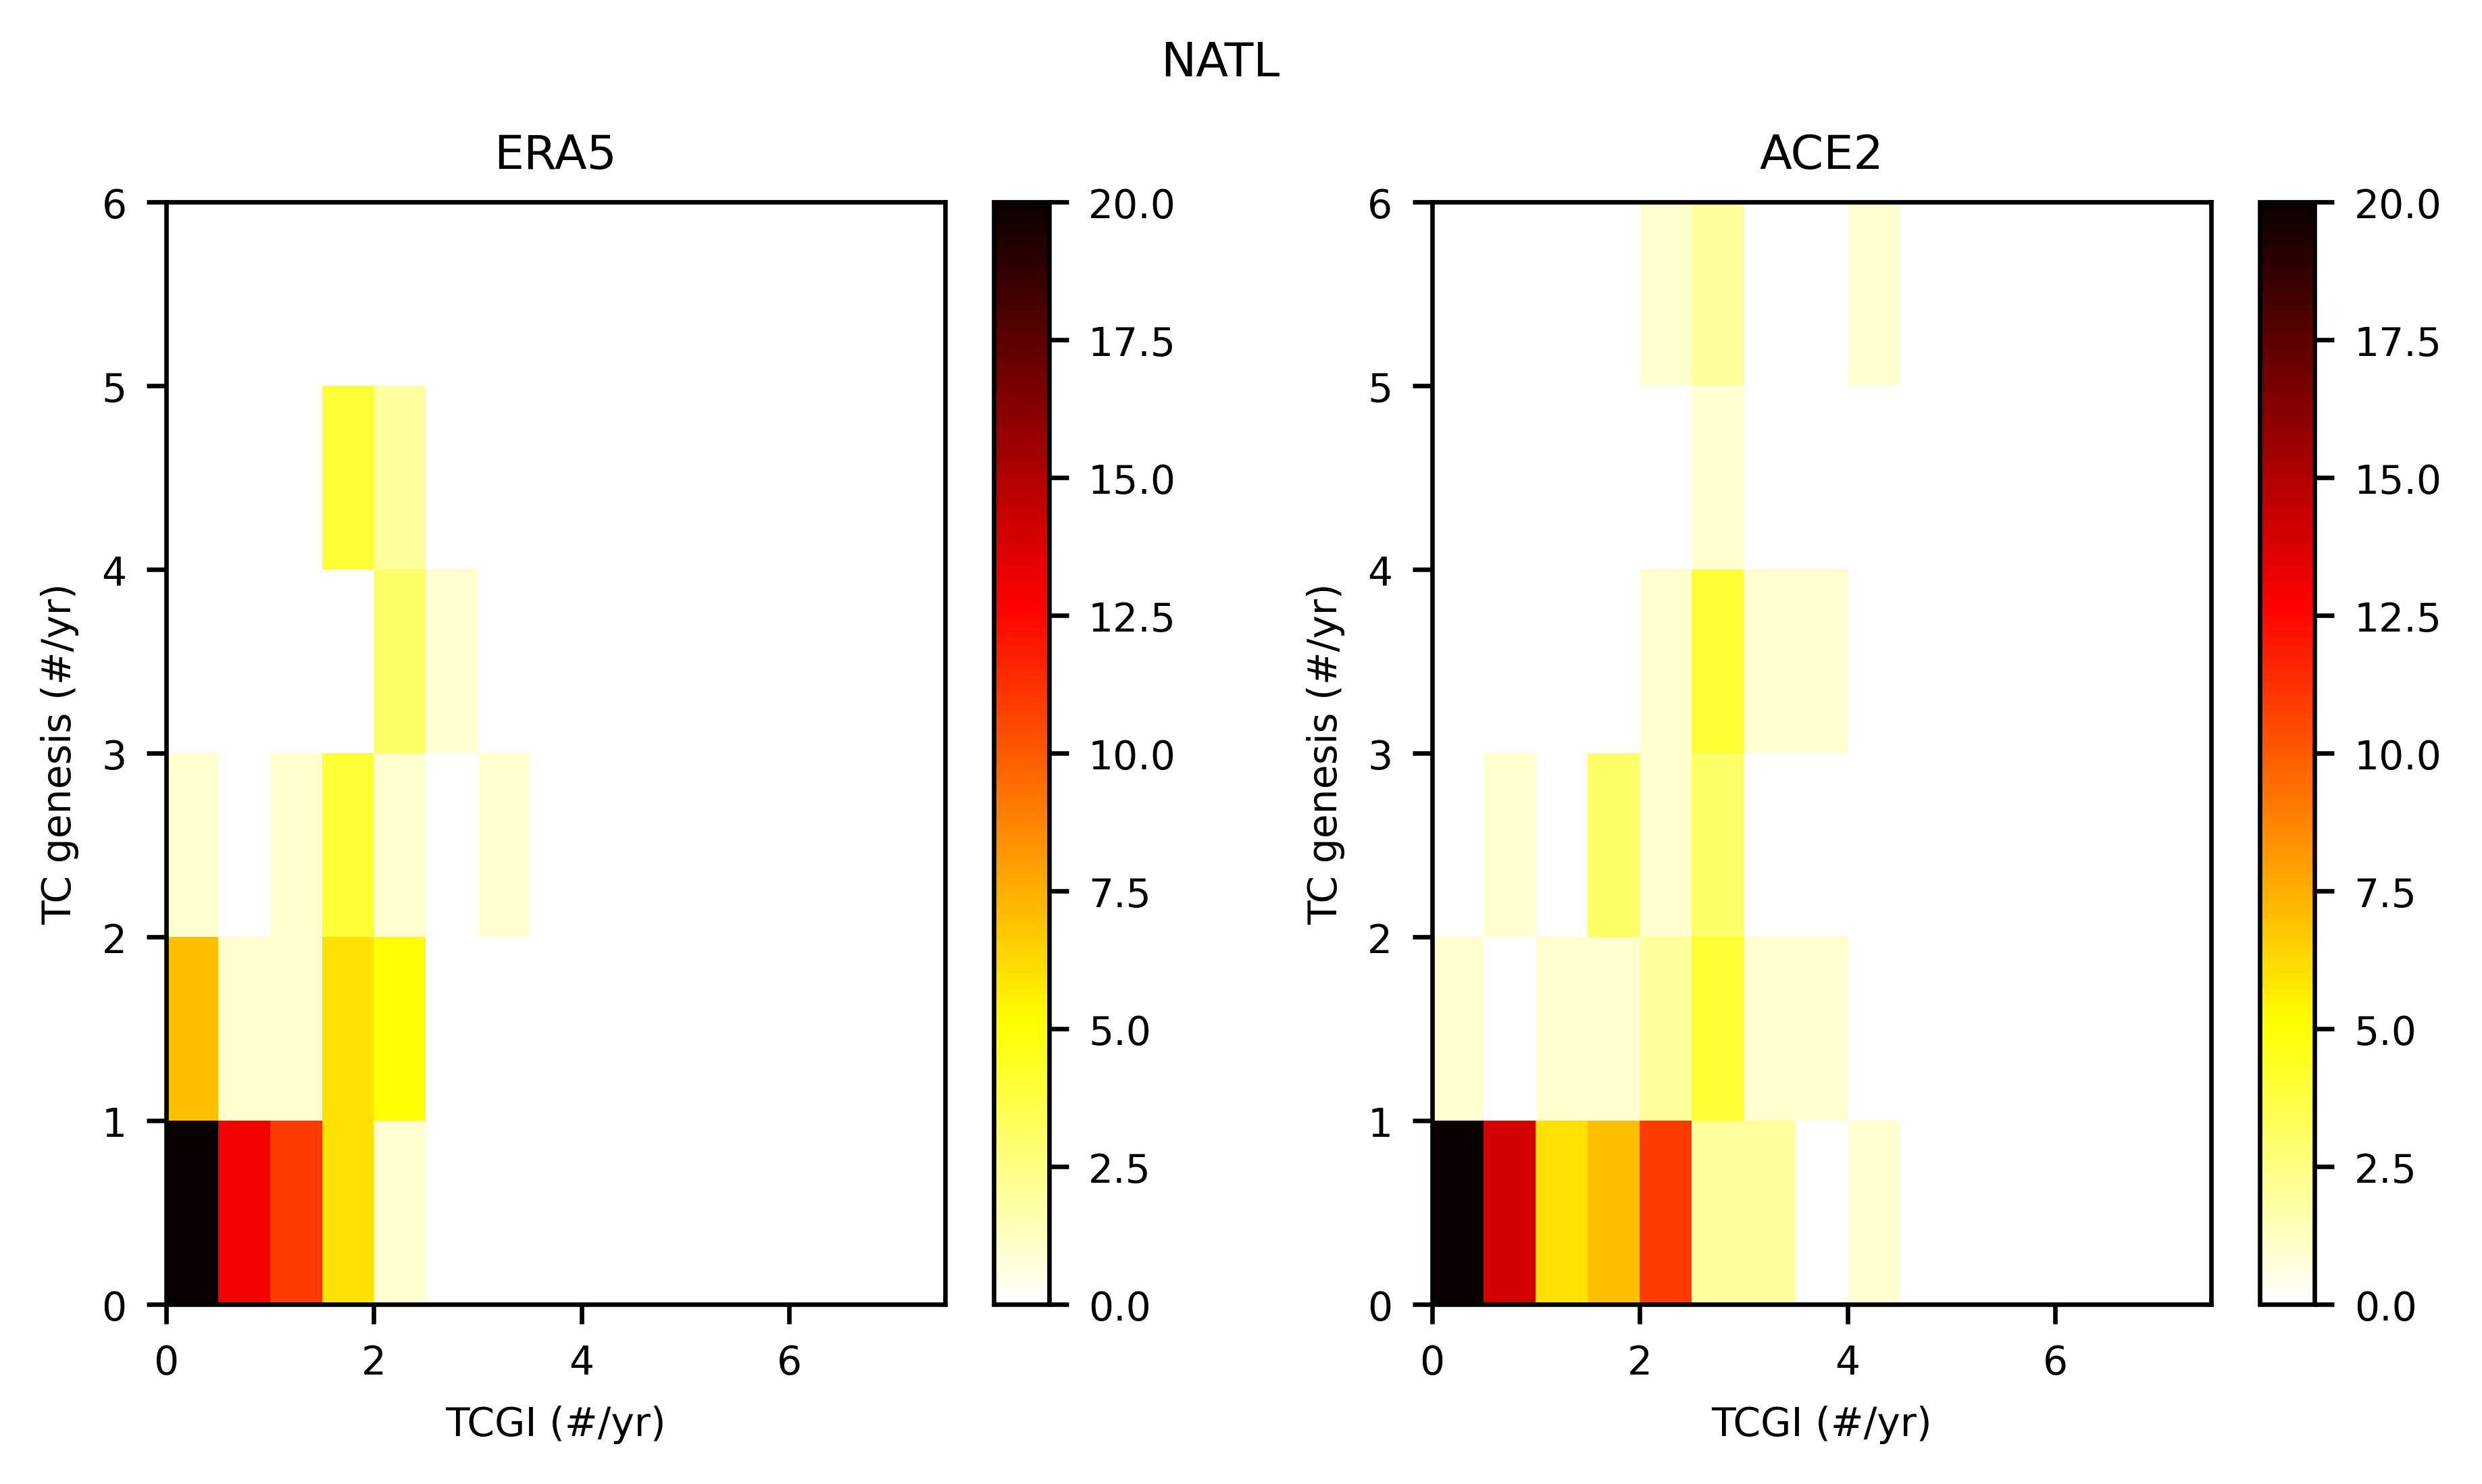

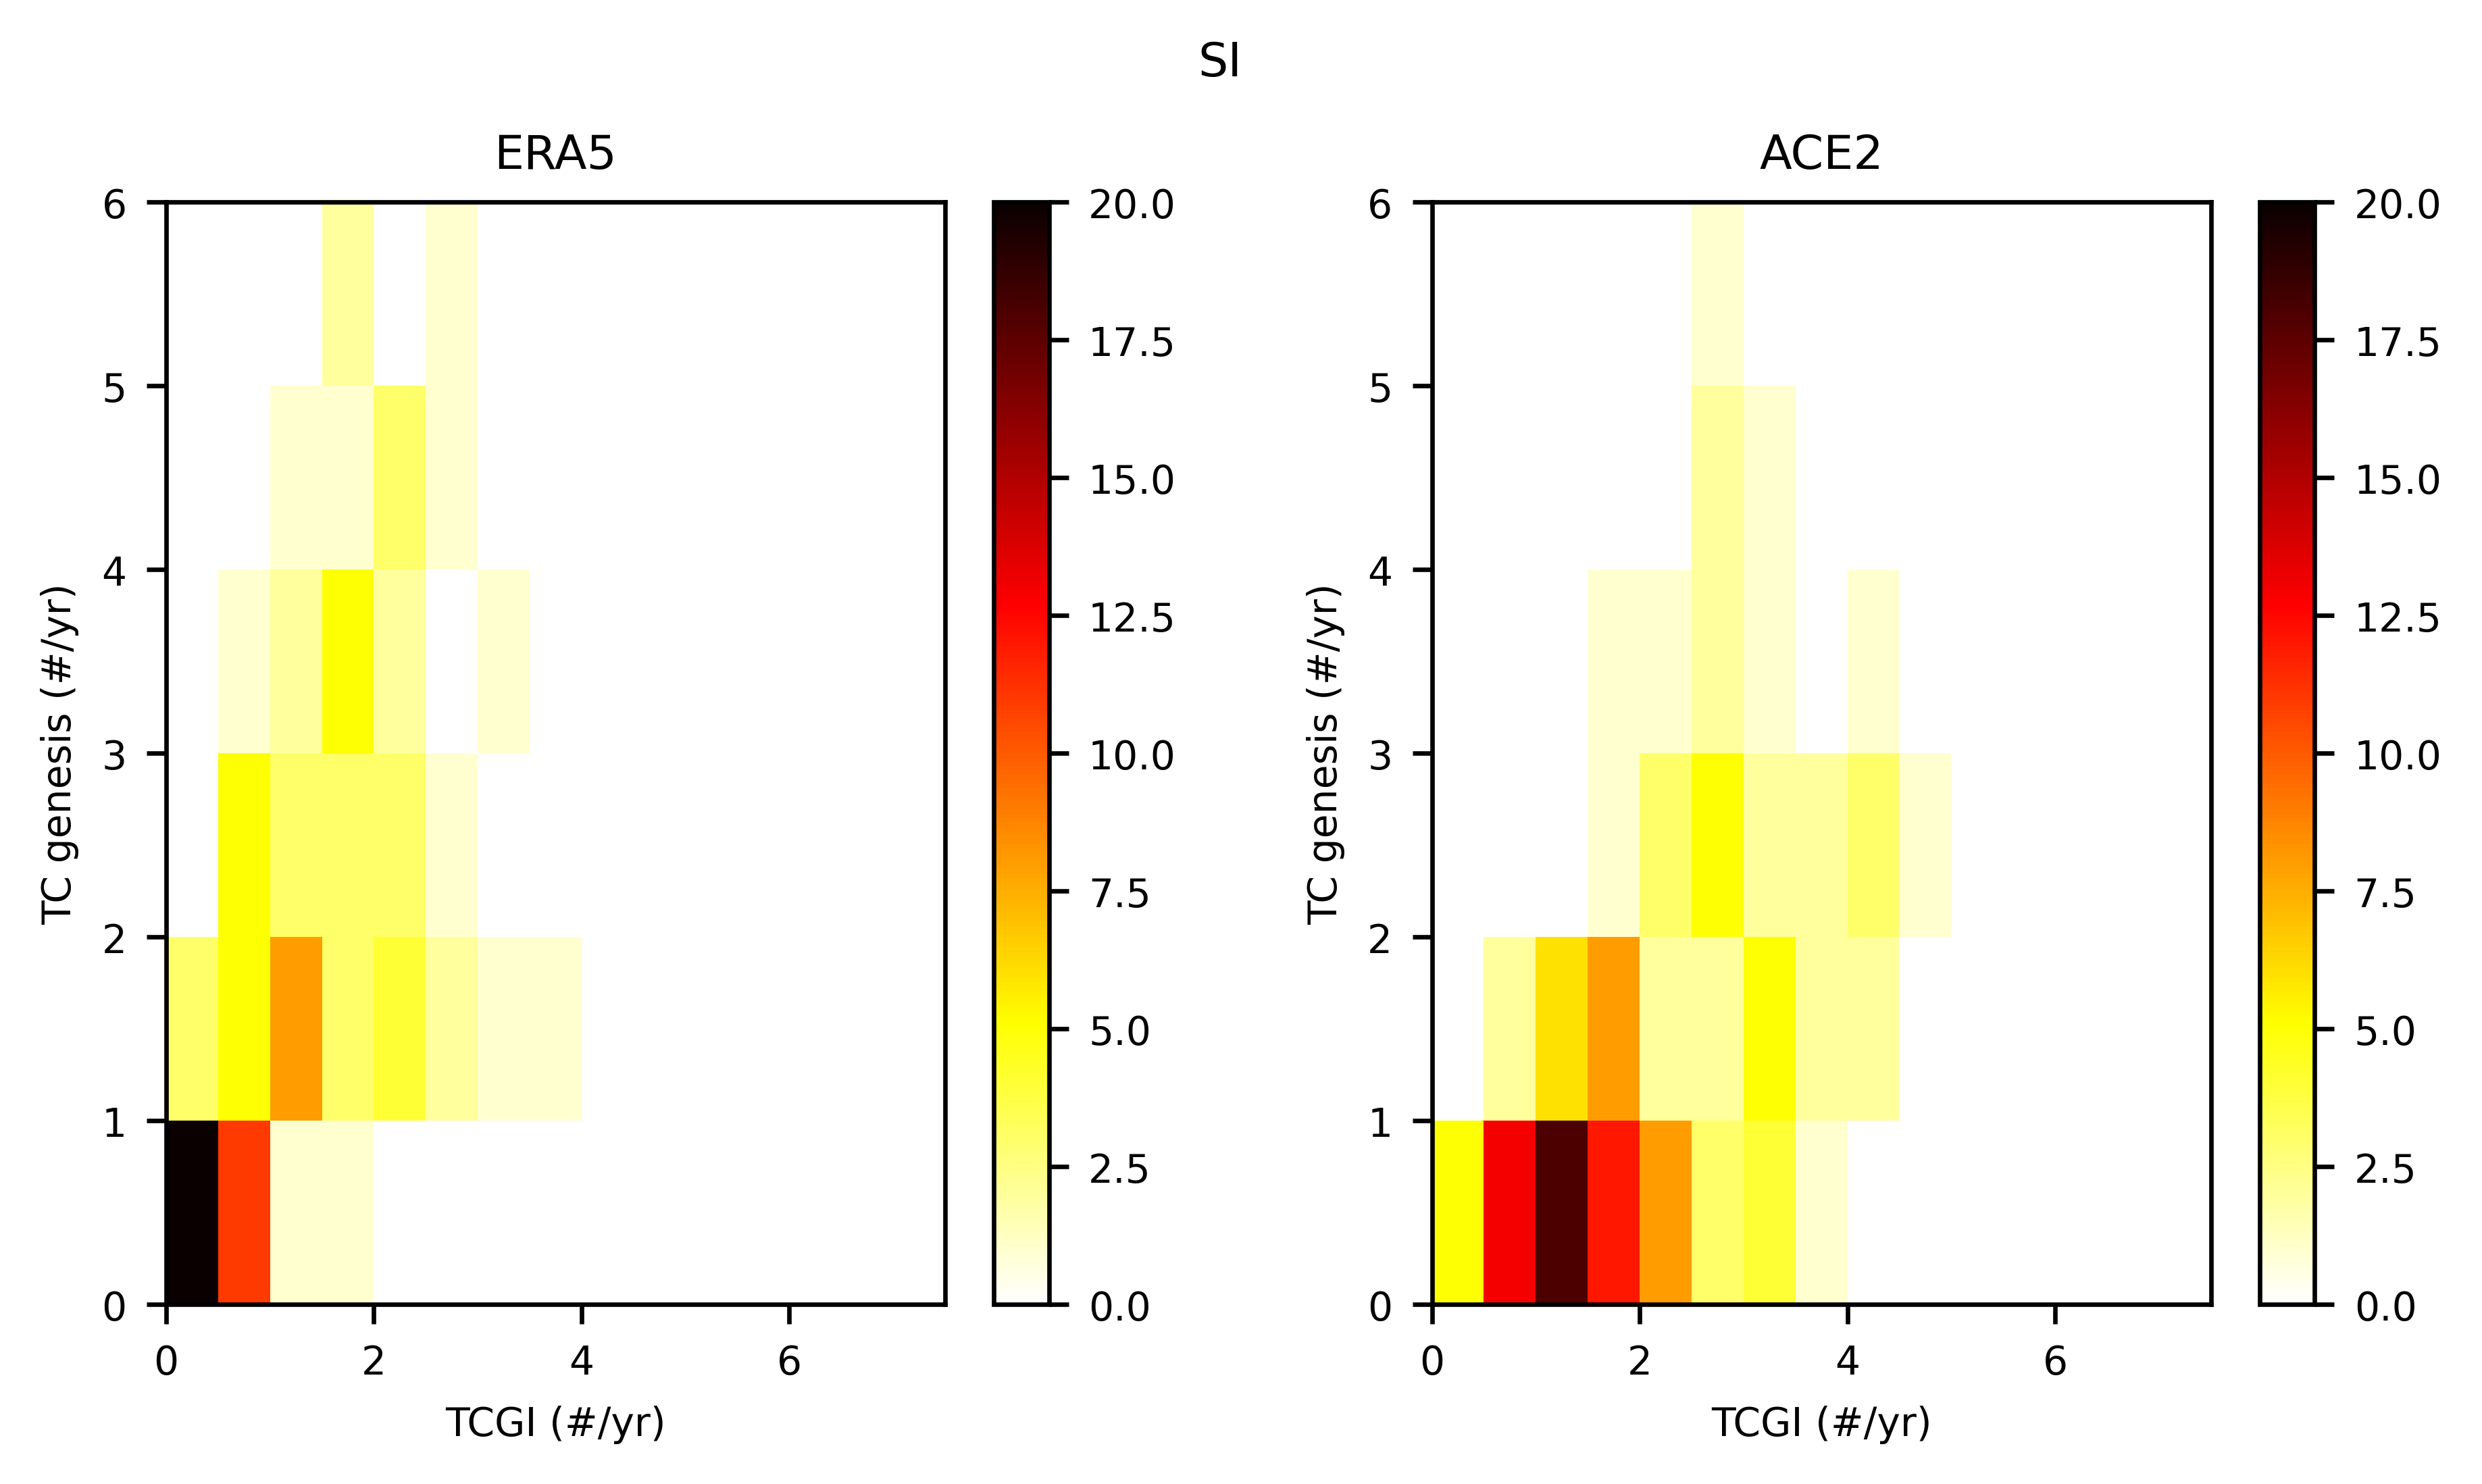

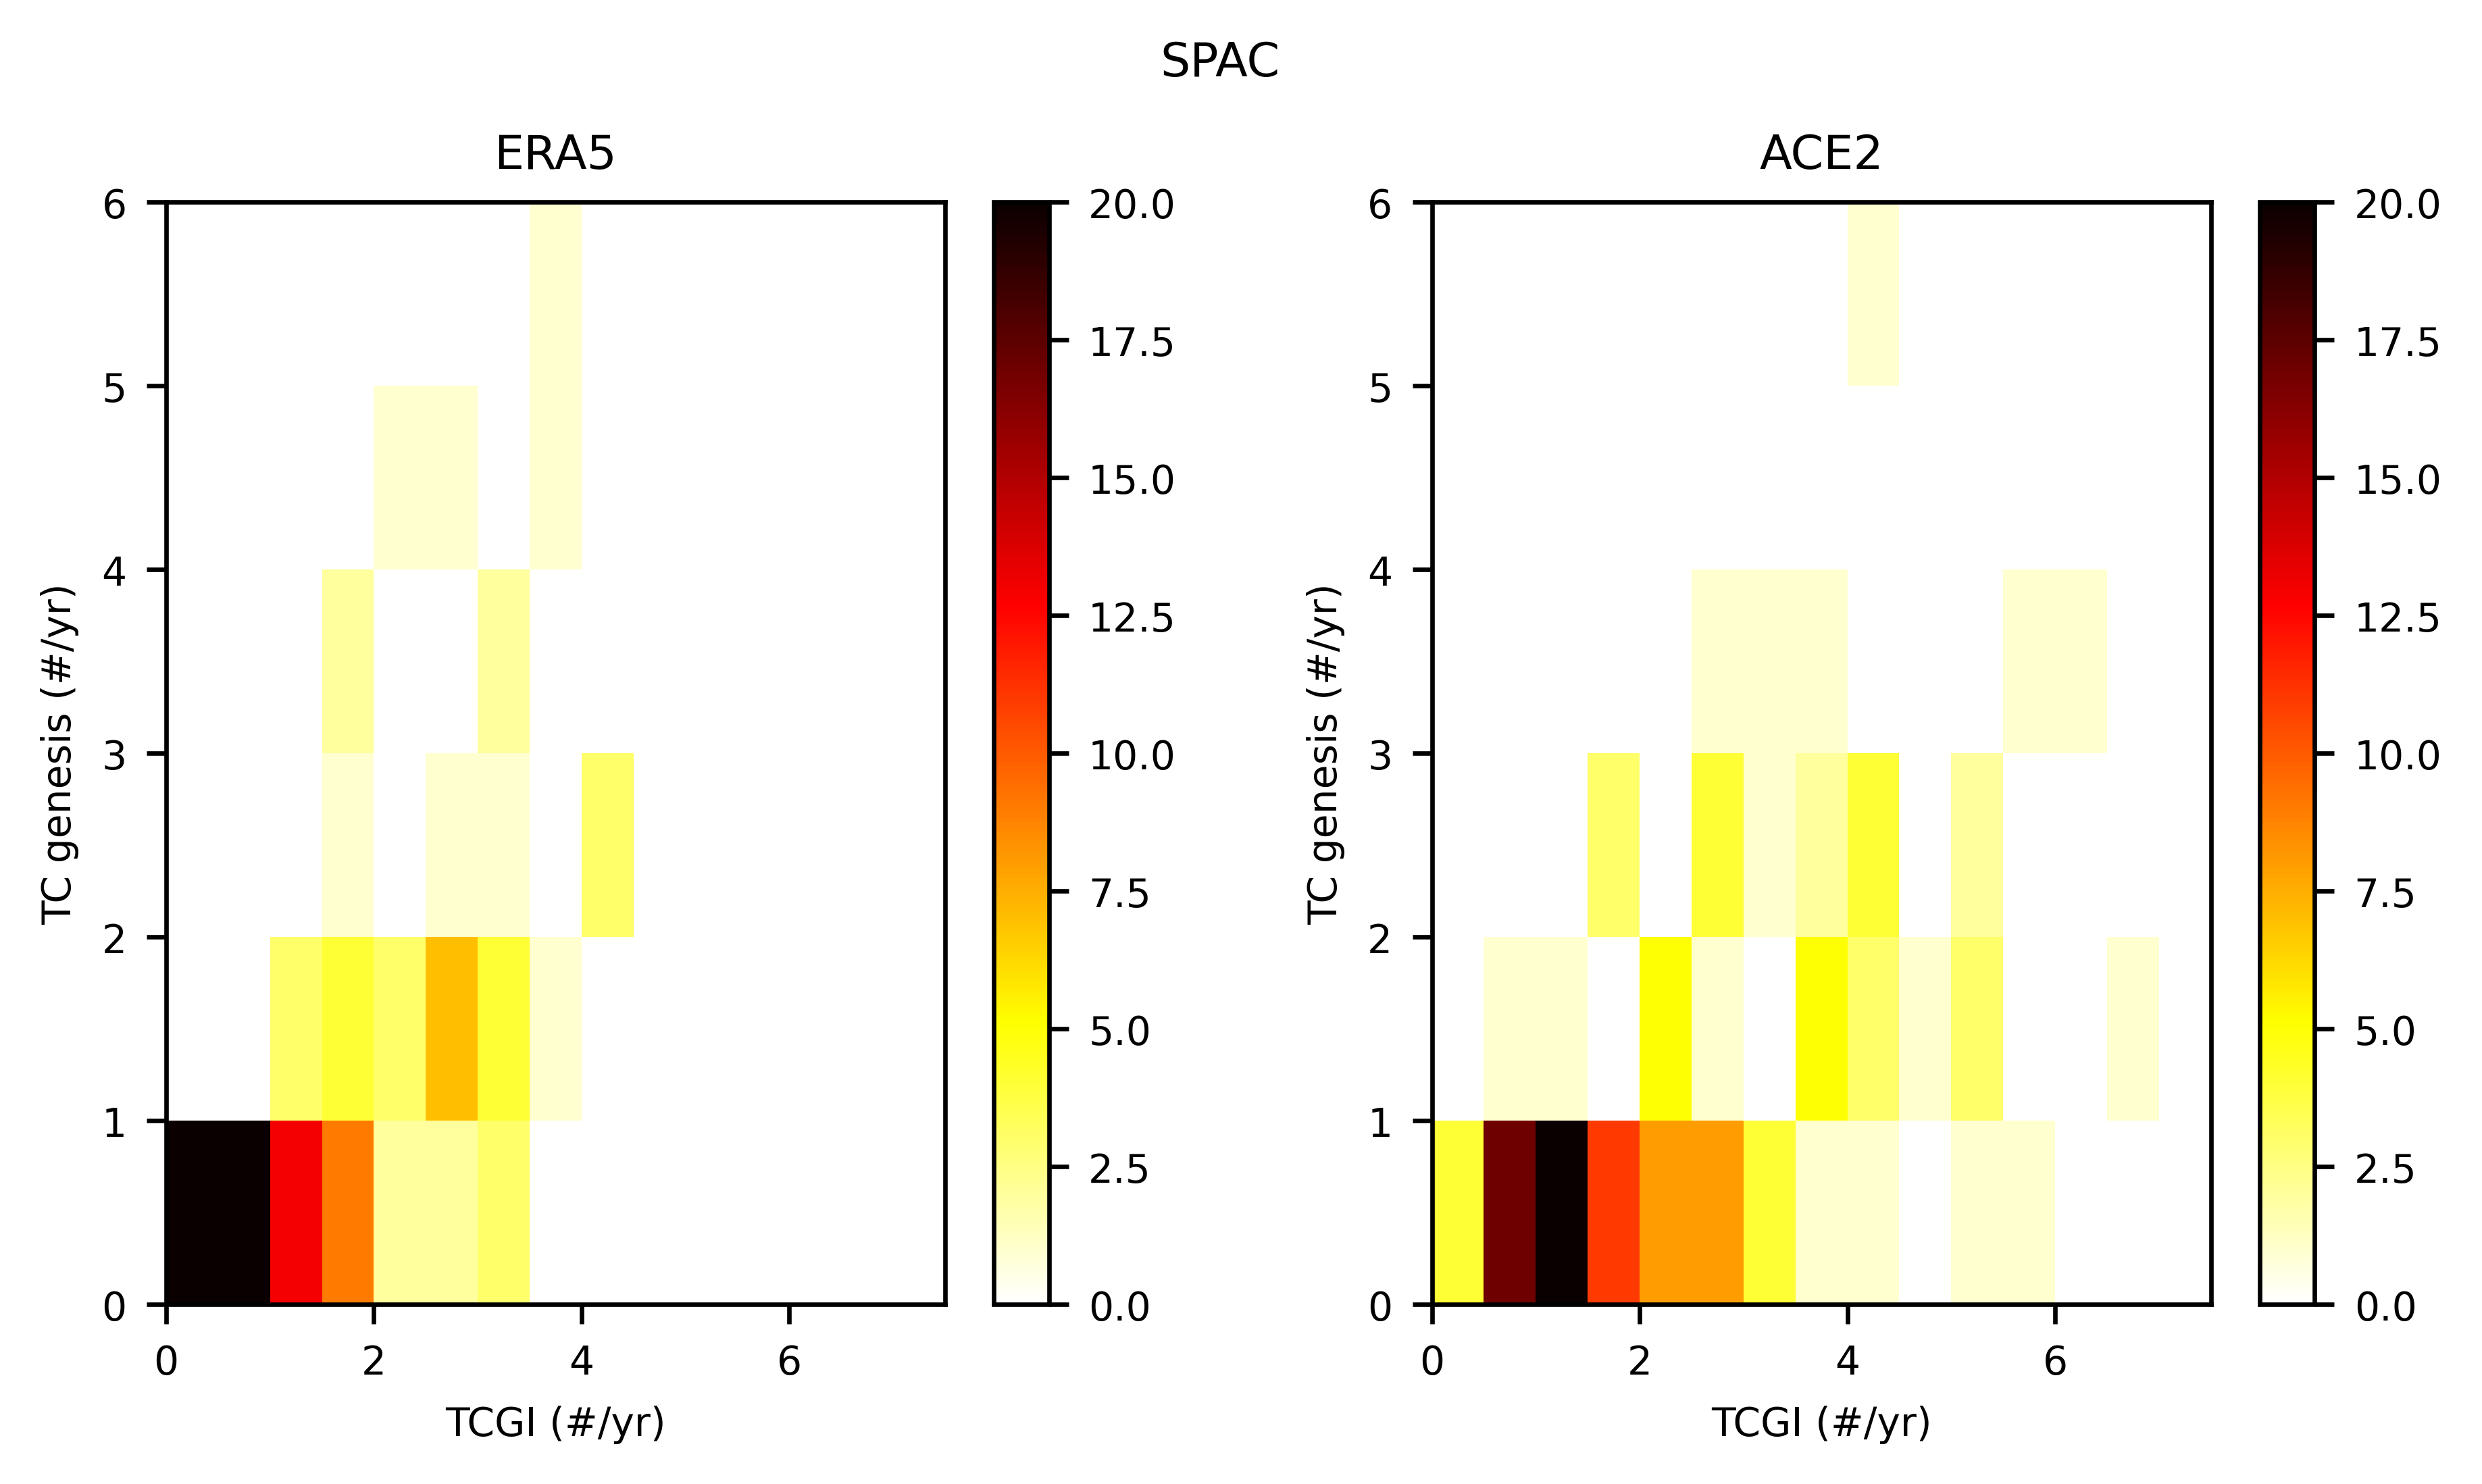

In [28]:
# Plot histogram

biny = np.arange(0, 7, 1)
binx = np.arange(0, 8, 0.5)
for ibasin in range(0, nbasin):
    fig = plt.subplots(1,2,figsize=(6.5, 4),dpi=600)
    plt.rcParams.update({'font.size': 7})
    plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.3, hspace=0.4)
    plt.subplot(1,2,1)
    plt.suptitle(basin_list[ibasin])
    tmpx = np.ndarray.flatten(TCGI_monthly_mon_yr_basin_era5[:,:,ibasin])/12
    tmpy = np.ndarray.flatten(TC_genesis_mon_yr_basin_era5[:,:,ibasin])
    plt.hist2d(tmpx, tmpy, bins=(binx, biny), cmap='hot_r',vmin=0, vmax=20)
    plt.title('ERA5')
    plt.xlabel('TCGI (#/yr)')
    plt.ylabel('TC genesis (#/yr)')
    plt.colorbar()
    #
    plt.subplot(1,2,2)
    tmpx = np.ndarray.flatten(TCGI_monthly_mon_yr_basin_ace2[:,:,ibasin])/12
    tmpy = np.ndarray.flatten(TC_genesis_mon_yr_basin_ace2[:,:,ibasin])
    plt.hist2d(tmpx, tmpy, bins=(binx, biny), cmap='hot_r',vmin=0, vmax=20)
    plt.title('ACE2')
    plt.xlabel('TCGI (#/yr)')
    plt.ylabel('TC genesis (#/yr)')
    plt.colorbar()
    plt.show()


# Scatter plot between annual TC number and TCGI

In [9]:
# Load TC genesis each month for each year
data = np.load(dir_in_ace2_TCGI + 'TC_genesis_number_mon_yr_basin_mem_ace2_'+str(latmax)+'SN_100yr.npz')
TC_genesis_mon_yr_basin_ace2 = data['TC_genesis_mon_yr_basin_ace2'] #(mon, yr, basin, mem)


data = np.load(file_dir_multi_yr + 'TC_genesis_number_yr_month_basin_ace2_era5-1deg_'+str(latmax)+'SN_2001-2010.npz')
#TC_genesis_mon_yr_basin_ace2 = data['TC_genesis_mon_yr_basin_ace2'] #(mon, yr, basin)
TC_genesis_mon_yr_basin_era5 = data['TC_genesis_mon_yr_basin_era5']

In [17]:
# Load TCGI
data = np.load(dir_in_ace2_TCGI+'TCGI_basin_statistics_ACE2_100yr.npz')
TCGI_monthly_mon_yr_basin_ace2 = data['TCGI_monthly_mon_yr_basin_ace2']

data = np.load(file_dir_multi_yr+'TCGI_ace2_era5_2001-2010_month_yr_basin.npz')
TCGI_monthly_mon_yr_basin_era5 = data['TCGI_monthly_mon_yr_basin_era5']
#TCGI_monthly_mon_yr_basin_ace2 =TCGI_monthly_mon_yr_basin_ace2 # 10 year

In [18]:
print(np.shape(TCGI_monthly_mon_yr_basin_ace2))
print(np.shape(TCGI_monthly_mon_yr_basin_era5))

(12, 10, 6, 10)
(12, 10, 6)


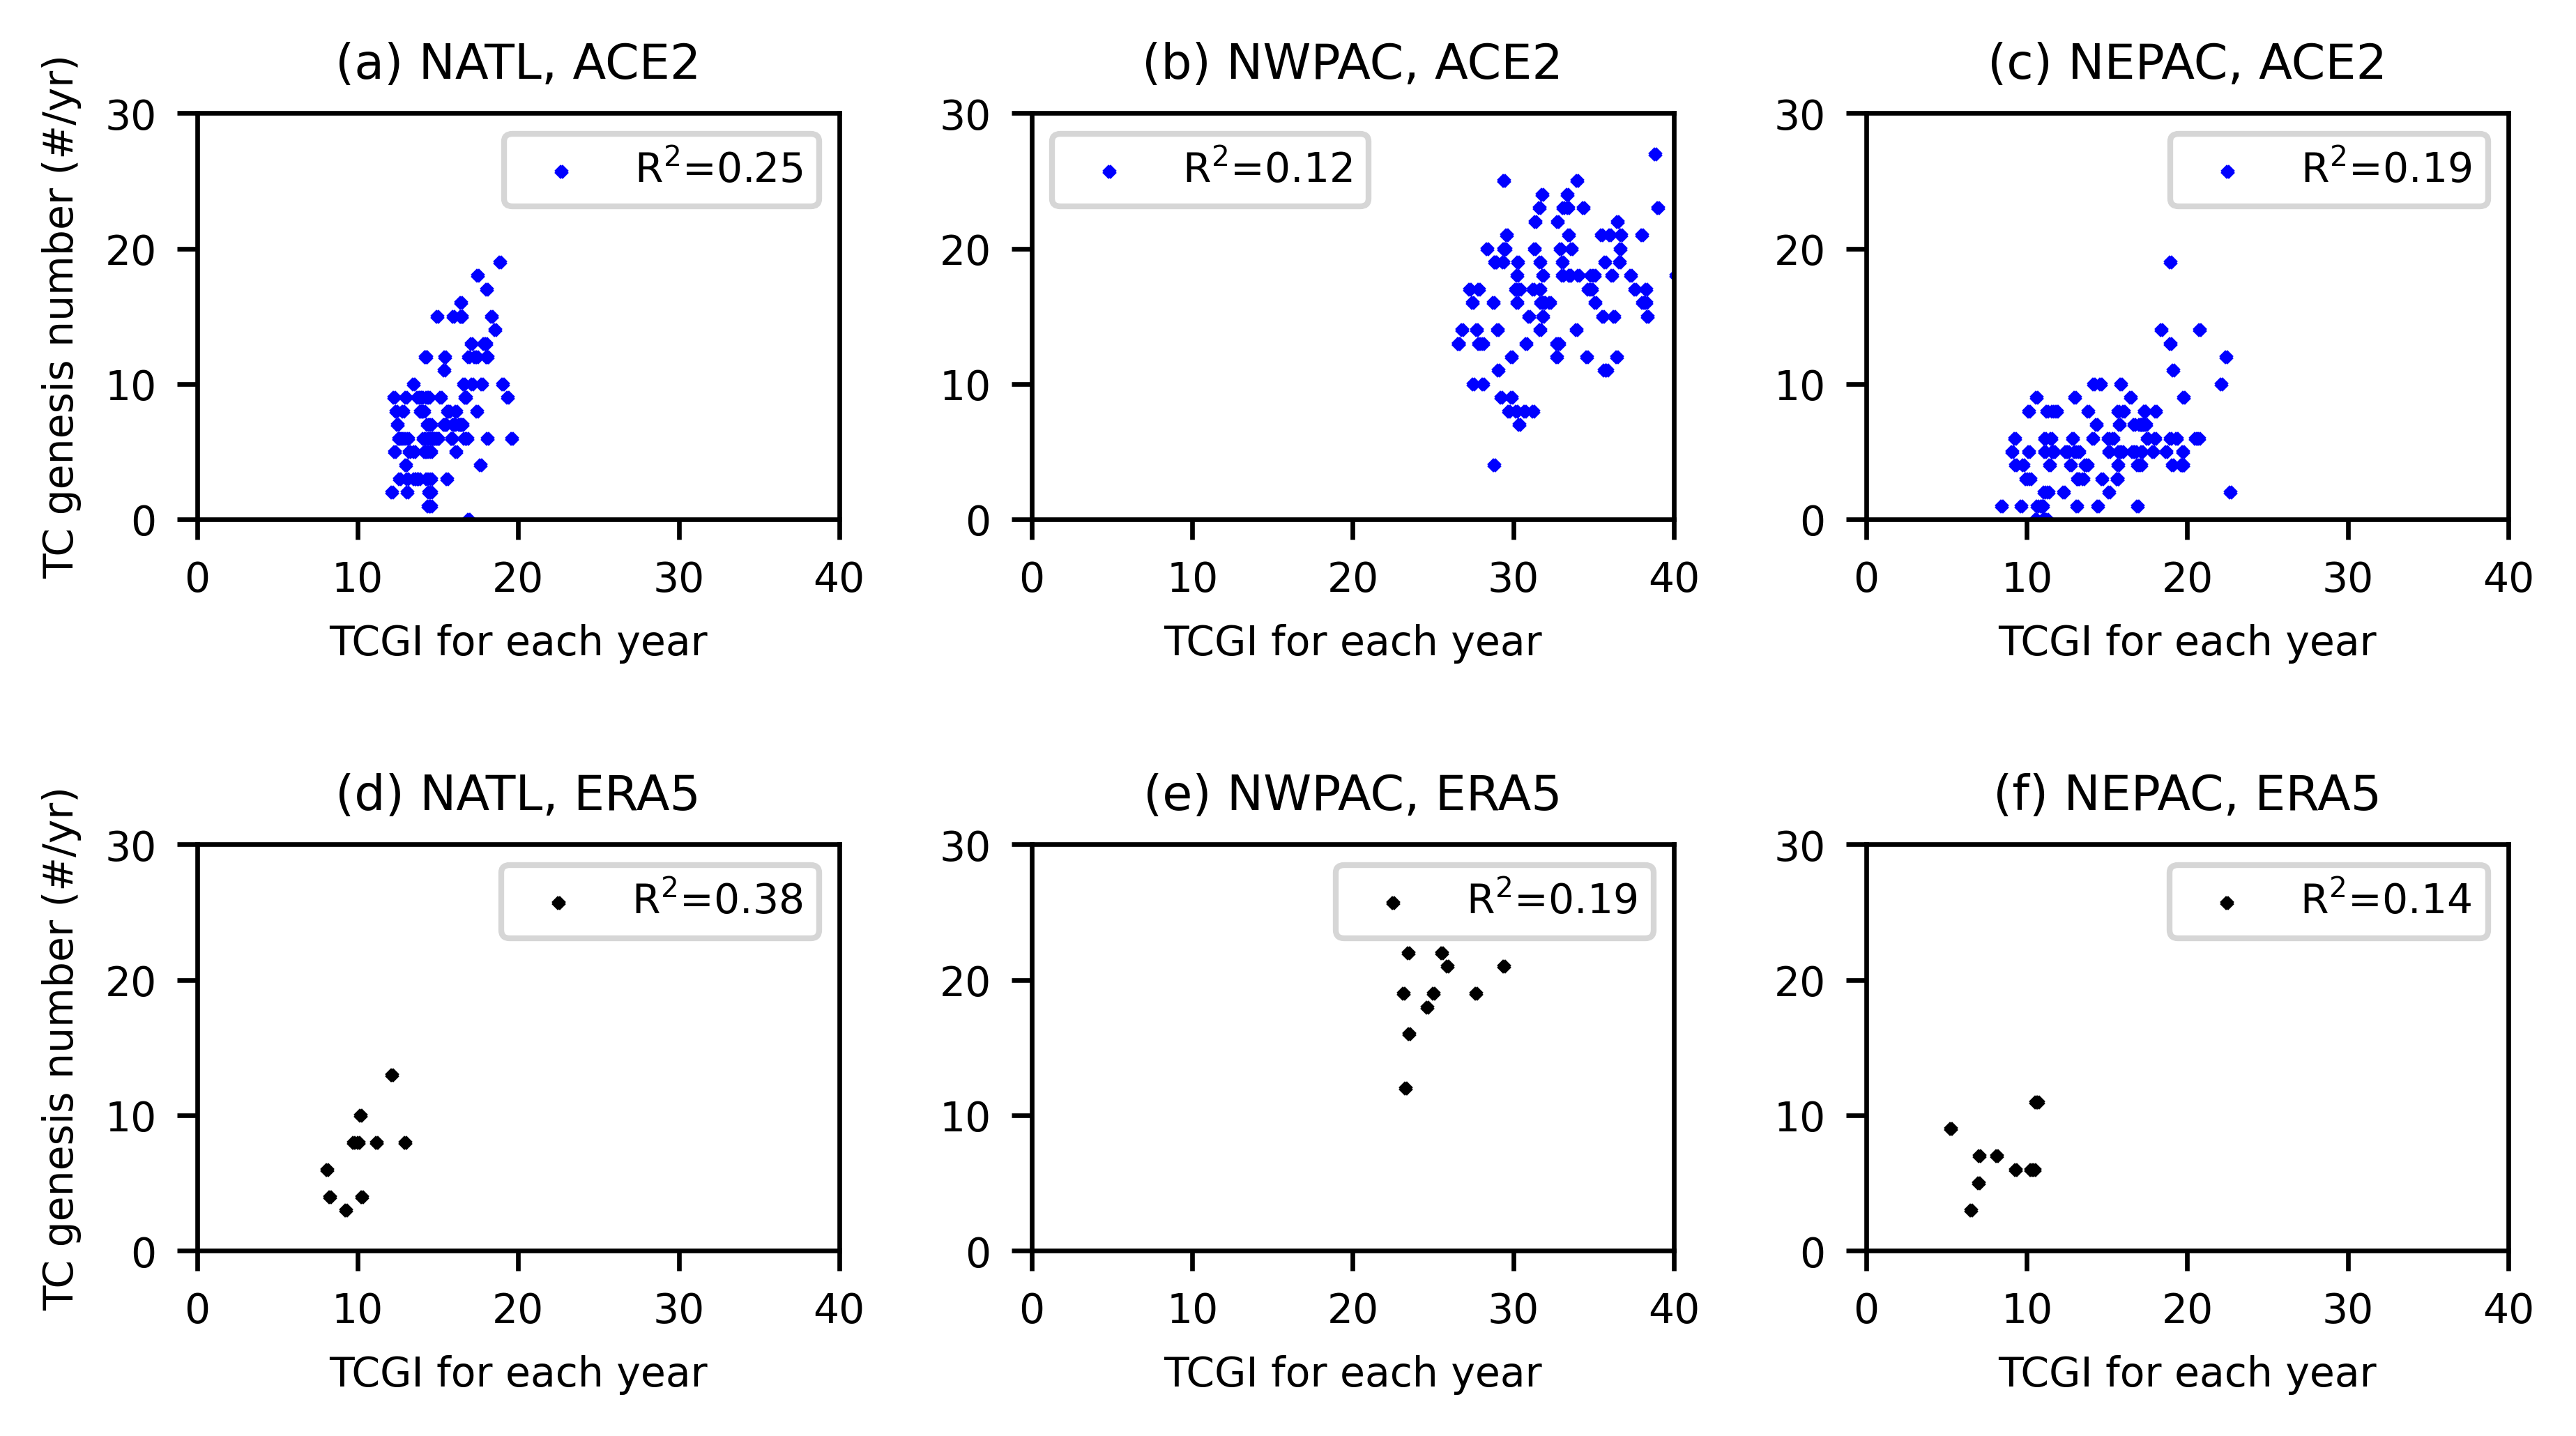

In [35]:
# Plot each year TC genesis vs. TCGI
plt_list = list(['_NH_only'])
plt_3fig_id = np.array([3,1,2])
label_list = list(['(a)','(b)','(c)','(d)','(e)','(f)'])

for iplt in range(0, np.size(plt_list)):
    fig_name = 'Fig.7.TC_genesis_vs_TCGI_annual_mean'+plt_list[iplt]+'.png'
    fig = plt.subplots(2,3,figsize=(6.5, 4),dpi=600)

    plt.rcParams.update({'font.size': 7})
    plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.3, hspace=0.8)

    for ibasin in range(0, 6):
        plt.subplot(2, 3, ibasin+1)

        if ibasin < 3:
            ibasin_plt = plt_3fig_id[ibasin]
            TC_genesis_tmp  = np.nansum(TC_genesis_mon_yr_basin_ace2[:,:,ibasin_plt,:],0) # Sum each month
            TCGI_tmp        = np.nansum(TCGI_monthly_mon_yr_basin_ace2[:,:,ibasin_plt,:]/12,0)
        else:
            ibasin_plt = plt_3fig_id[ibasin-3]
            TC_genesis_tmp  = np.nansum(TC_genesis_mon_yr_basin_era5[:,:,ibasin_plt],0) # Sum each month
            TCGI_tmp        = np.nansum(TCGI_monthly_mon_yr_basin_era5[:,:,ibasin_plt]/12,0)            

        #print(np.nanmin(TC_genesis_tmp), np.nanmax(TC_genesis_tmp))
        #print(np.nanmin(TCGI_tmp), np.nanmax(TCGI_tmp))

        TCGI_tmp2 = TCGI_tmp[np.isnan(TCGI_tmp)==0]
        TC_genesis_tmp2 = TC_genesis_tmp[np.isnan(TCGI_tmp)==0]

        # Calc correlation coefficient
        tmp = np.corrcoef(TCGI_tmp2, TC_genesis_tmp2)
        r2 = tmp[0,1]**2

        # save r^2
        r2_str = f"{r2:.2f}"

        if ibasin < 3:
            plt.scatter(TCGI_tmp, TC_genesis_tmp, color='b', marker='x', s=2) 
        else:
            plt.scatter(TCGI_tmp, TC_genesis_tmp, color='k', marker='x', s=2) 

        plt.xlim([0, 40])
        plt.ylim([0, 30])
        plt.xticks(np.arange(0, 50, 10))
        plt.yticks(np.arange(0, 40, 10))
        plt.xlabel('TCGI for each year')
        if ibasin == 0 or ibasin == 3:
            plt.ylabel('TC genesis number (#/yr)')
        
        if ibasin < 3:
            plt.title(label_list[ibasin]+' '+basin_list[ibasin_plt]+', ACE2')
            plt.legend(['R$^{2}$='+r2_str])
        else:
            plt.title(label_list[ibasin]+' '+basin_list[ibasin_plt]+', ERA5')
            plt.legend(['R$^{2}$='+r2_str])            
    plt.savefig(fig_dir+fig_name,format='png', dpi=600)
    plt.show()

# Figure 8 Wheeler-Kildis Diagram

In [4]:
# Load power spectrum saved from Tropical_wave.py

# Load 10-yr observation
file_dir_multi_yr = DIR + 'data_output/ace2/obs_compare_with_ace2/'
data              = np.load(file_dir_multi_yr+'pr_wavenum_freq_10yr_imerg_2001-2010.npz')#, power_pr_sym=power_pr_sym, \
power_pr_sym_obs  = data['power_pr_sym']
power_pr_asy_obs  = data['power_pr_asy']
r_sym_obs         = data['r_sym']
r_asy_obs         = data['r_asy']
power_bg_obs      = data['power_background']
x                 = data['x']
y                 = data['y']
#freq=freq, zonalwnum=zonalwnum

# 10-yr ACE2 simulation
file_dir_multi_yr = DIR + 'data_output/ace2/ace2_output/10yr/'
data             = np.load(file_dir_multi_yr+'pr_wavenum_freq_10yr_1mem.npz')
power_pr_sym_ace2 = data['power_pr_sym']
power_pr_asy_ace2 = data['power_pr_asy']
r_sym_ace2        = data['r_sym']
r_asy_ace2        = data['r_asy']
power_bg_ace2     = data['power_background']

n0 = np.size(x, 0)
n1 = np.size(x, 1)

# 100-yr ACE2 simulation
power_pr_sym_ace2_100yr = np.empty([n0, n1, nsub])
power_pr_asy_ace2_100yr = np.empty([n0, n1, nsub])
r_sym_ace2_100yr        = np.empty([n0, n1, nsub])
r_asy_ace2_100yr        = np.empty([n0, n1, nsub])
power_bg_ace2_100yr     = np.empty([n0, n1, nsub]) 
for isub in range(0, nsub):
    file_dir_multi_yr                 = DIR + 'data_output/ace2/ace2_output/repeat_2001-2010/'+sub_dir[isub]+'/'
    data                              = np.load(file_dir_multi_yr+'pr_wavenum_freq_10yr_'+sub_dir[isub]+'.npz')
    power_pr_sym_ace2_100yr[:,:,isub] = data['power_pr_sym']
    r_sym_ace2_100yr[:,:,isub]        = data['r_sym']
    r_asy_ace2_100yr[:,:,isub]        = data['r_asy']
    power_pr_asy_ace2_100yr[:,:,isub] = data['power_pr_asy']
    power_bg_ace2_100yr[:,:,isub]     = data['power_background']

power_pr_sym_ace2_100yr_mean = np.nanmean(power_pr_sym_ace2_100yr, 2)
power_pr_asy_ace2_100yr_mean = np.nanmean(power_pr_asy_ace2_100yr, 2)
r_sym_ace2_100yr_mean        = np.nanmean(r_sym_ace2_100yr, 2)
r_asy_ace2_100yr_mean        = np.nanmean(r_asy_ace2_100yr, 2)
power_bg_ace2_100yr_mean     = np.nanmean(power_bg_ace2_100yr, 2)

/tmp/ipykernel_1237097/3638734330.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  power_pr_sym_ace2_100yr[:,:,isub] = data['power_pr_sym']
/tmp/ipykernel_1237097/3638734330.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  r_sym_ace2_100yr[:,:,isub]        = data['r_sym']
/tmp/ipykernel_1237097/3638734330.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  r_asy_ace2_100yr[:,:,isub]        = data['r_asy']
/tmp/ipykernel_1237097/3638734330.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  power_pr_asy_ace2_100yr[:,:,isub] = data['power_pr_asy']
/tmp/ipykernel_1237097/3638734330.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  power_bg_ace2_100yr[:,:,isub]     = data['power_background']


/tmp/ipykernel_1198735/1785389482.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(x,y,np.log10(VAR),cmap=get_cmap('hot_r'),levels = clev,extend='both')


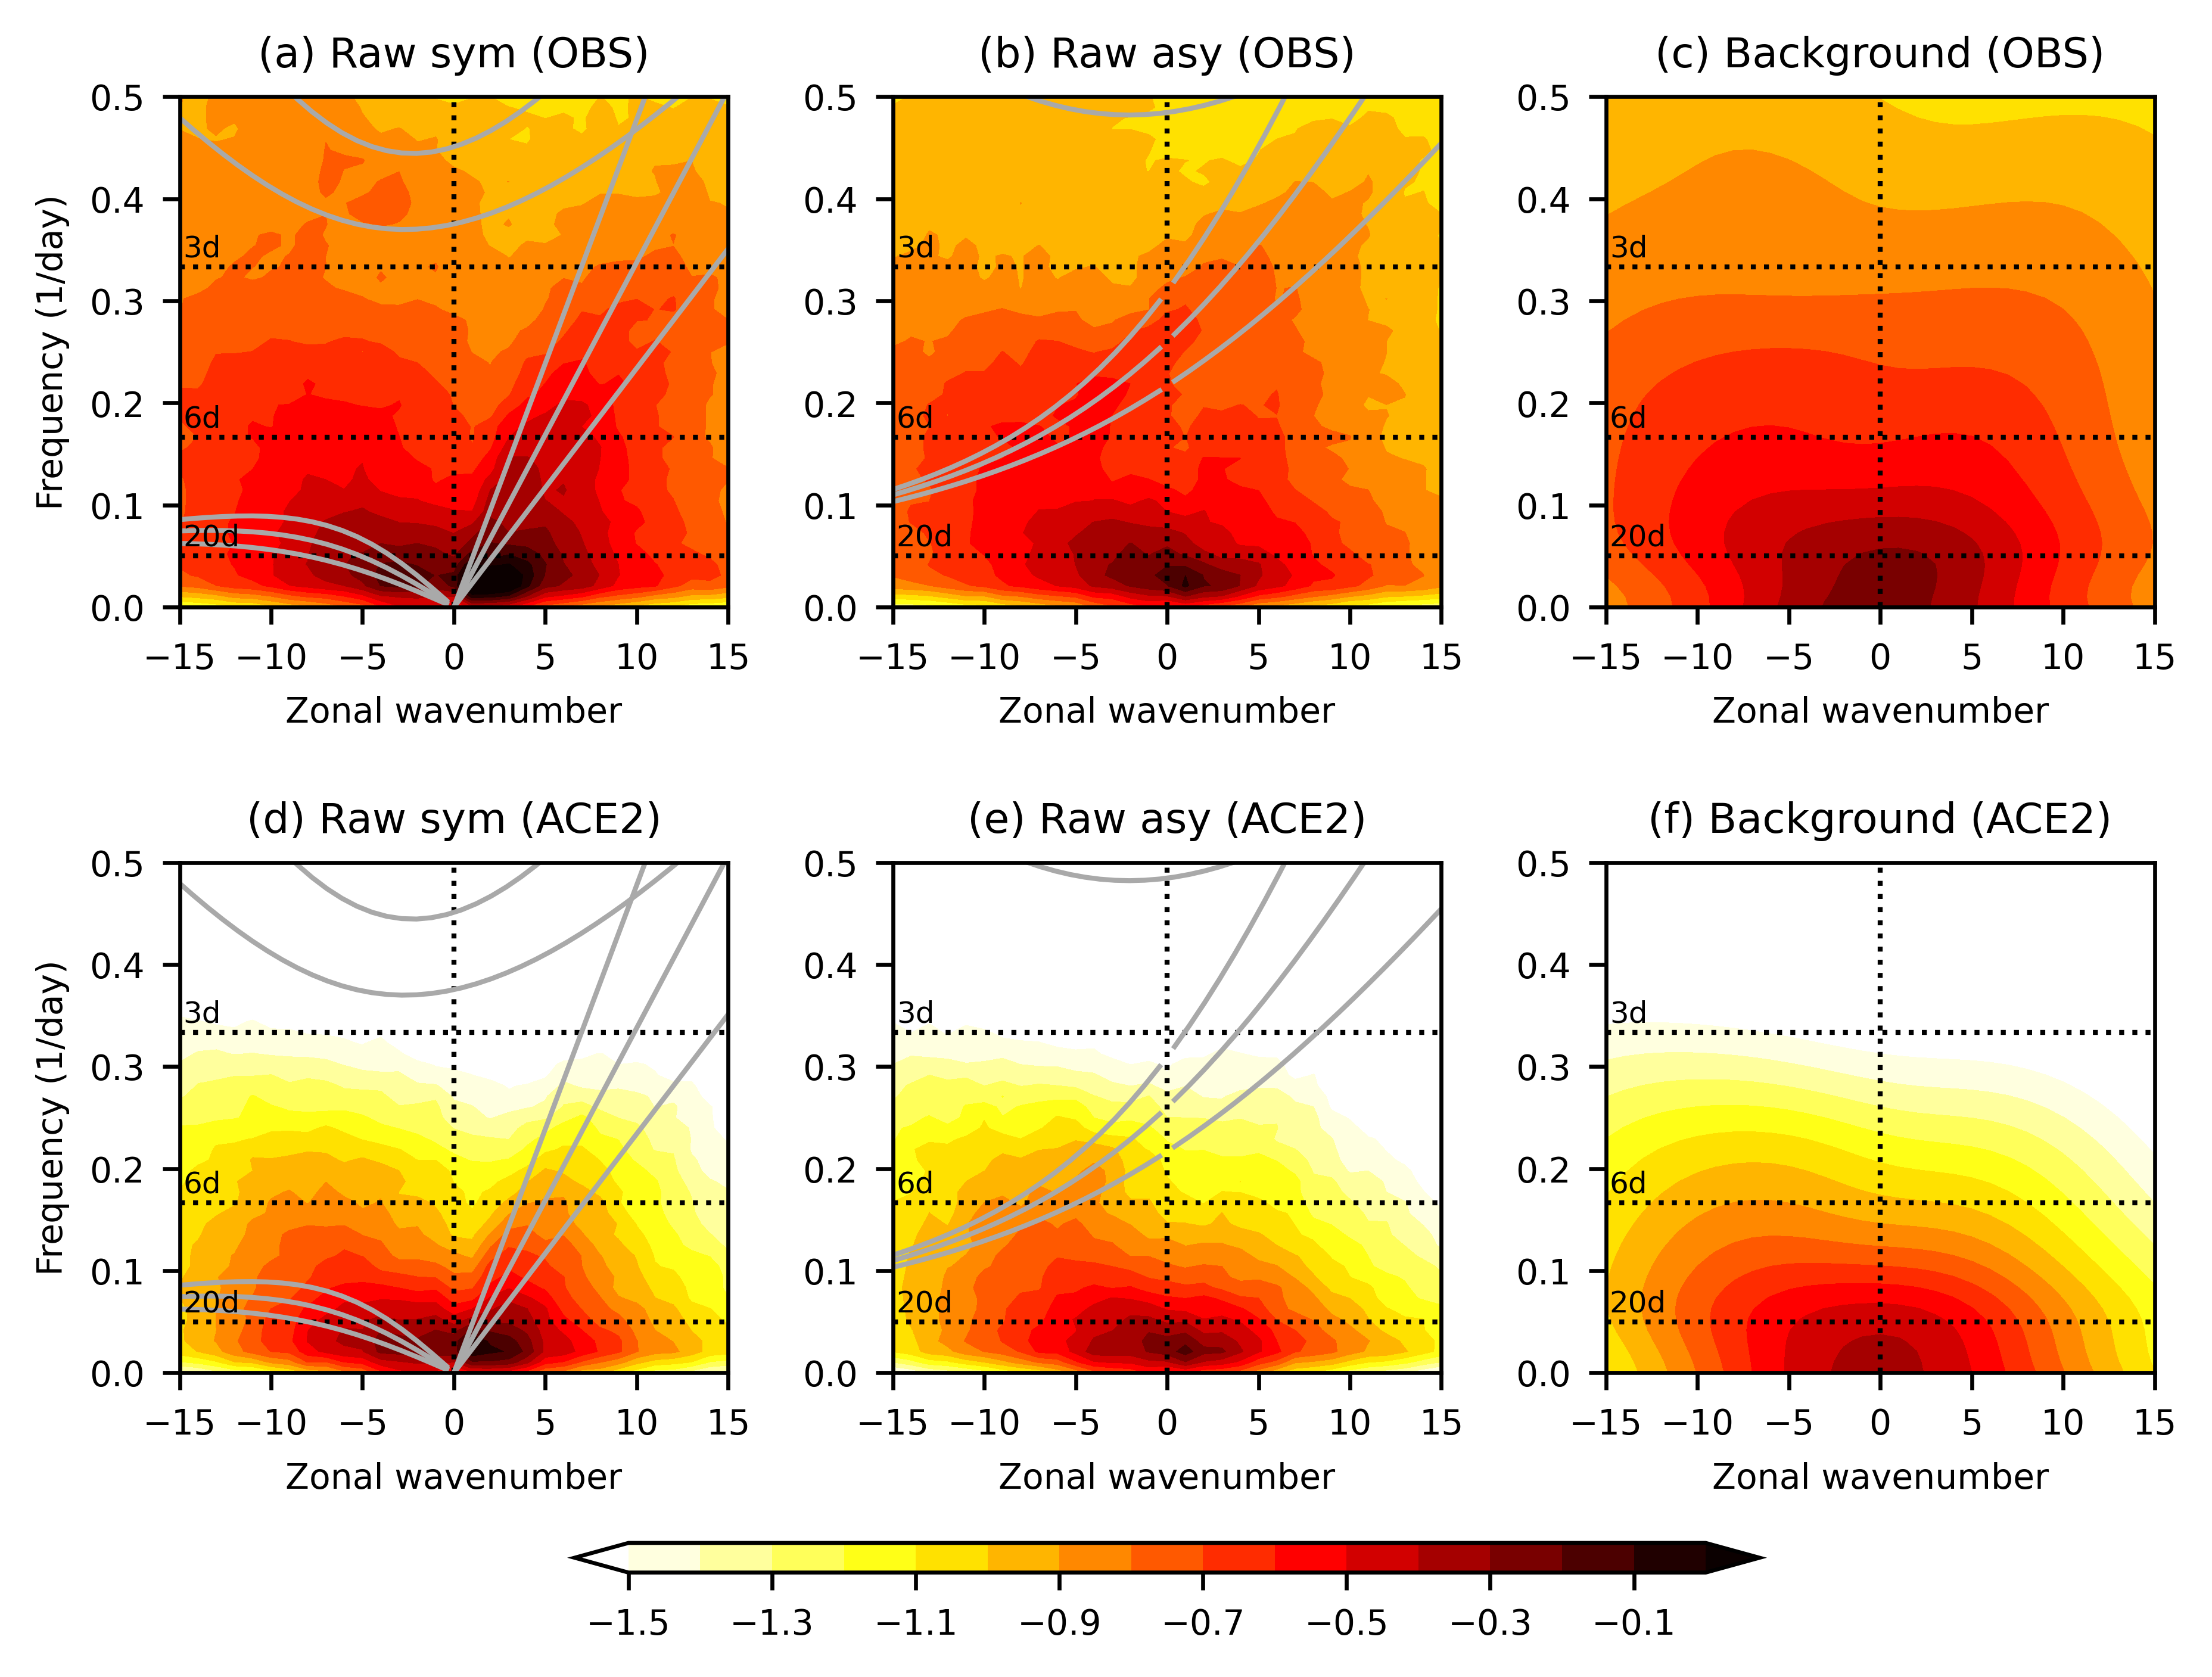

In [60]:
############################
# Plotting raw and background spectrum
#############################
from matplotlib.cm import get_cmap
clev = np.arange(-1.5,0.1,0.1)
cticks = np.arange(-1.5, 0.1, 0.2)
d = np.array([3,6,20]) # mark 3, 6, 20 day in WK1999
dname = list(['3d','6d','20d'])
vname = list(['power_pr_sym_obs','power_pr_asy_obs','power_bg_obs',\
              'power_pr_sym_ace2','power_pr_asy_ace2','power_bg_ace2'])
title = list(['(a) Raw sym (OBS)','(b) Raw asy (OBS)','(c) Background (OBS)',\
              '(d) Raw sym (ACE2)','(e) Raw asy (ACE2)','(f) Background (ACE2)'])

fig_name = 'Fig.S1.raw_power_spectrum_10yr.png'
fig, axes = plt.subplots(2,3,figsize=(6.5, 7),dpi=600)
plt.rcParams.update({'font.size': 7})
plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.3, hspace=0.5)
for iplt in range(0, 6):
    plt.subplot(2, 3, iplt+1)
    ax = plt.gca()
    if iplt == 0 or iplt == 3:
        sym_asy = 0 # plot symmetric spectrum
    elif iplt == 1 or iplt == 4:
        sym_asy = 1 # plot asymmetric spectrum
    elif iplt == 2  or iplt == 5:
        sym_asy = 2 # plot background spectrum

    VAR = globals()[vname[iplt]]
    plt.contourf(x,y,np.log10(VAR),cmap=get_cmap('hot_r'),levels = clev,extend='both')
    if iplt == 5:
        cb = plt.colorbar(ax=axes[:,:],orientation = 'horizontal',shrink=.6, aspect=40, pad=0.1)
        cb.set_ticks(cticks)
    # Mark 3, 6, 20 day period:
    for dd in range(0,np.size(d)):
        plt.plot([-15,15], [1/d[dd],1/d[dd]], 'k',linewidth=1, linestyle=':')
        plt.text(-14.8,1/d[dd]+0.01,dname[dd], fontsize=6)
    
    plt.title(title[iplt])

    # Mark zwnum == 0:
    plt.plot([0,0],[0,0.5],'k',linewidth=1,linestyle=':')#'dashed')
    plt.xlim([-15,15])
    plt.ylim([0,0.5])
    plt.xticks(np.arange(-15,20,5))
    plt.xlabel('Zonal wavenumber')
    if iplt == 0 or iplt == 3:
        plt.ylabel('Frequency (1/day)')

    swfreq,swwn = ATM.genDispersionCurves()
    # swfreq.shape # -->(6, 3, 50)
    swf = np.where(swfreq == 1e20, np.nan, swfreq)
    swk = np.where(swwn == 1e20, np.nan, swwn)
    c = 'darkgray' # COLOR FOR DISPERSION LINES/LABELS
    
    if sym_asy == 0:
        ii_st = 3
        ii_end = 6
    elif sym_asy == 1:
        ii_st = 0
        ii_end = 3
    else:
        ii_st = 0
        ii_end = 0

    for ii in range(ii_st, ii_end):
        ax.plot(swk[ii, 0,:], swf[ii,0,:], color=c, linewidth=1)
        ax.plot(swk[ii, 1,:], swf[ii,1,:], color=c, linewidth=1)
        ax.plot(swk[ii, 2,:], swf[ii,2,:], color=c, linewidth=1)
    #ax.axvline(0, linestyle='dashed', color='lightgray')
    
plt.savefig(fig_dir_supplement + fig_name,format='png', dpi=600)
plt.show()

/home/C832572266/.conda/envs/muting-ai-models/lib/python3.12/site-packages/matplotlib/contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/C832572266/.conda/envs/muting-ai-models/lib/python3.12/site-packages/matplotlib/contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/C832572266/.conda/envs/muting-ai-models/lib/python3.12/site-packages/numpy/ma/core.py:2846: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


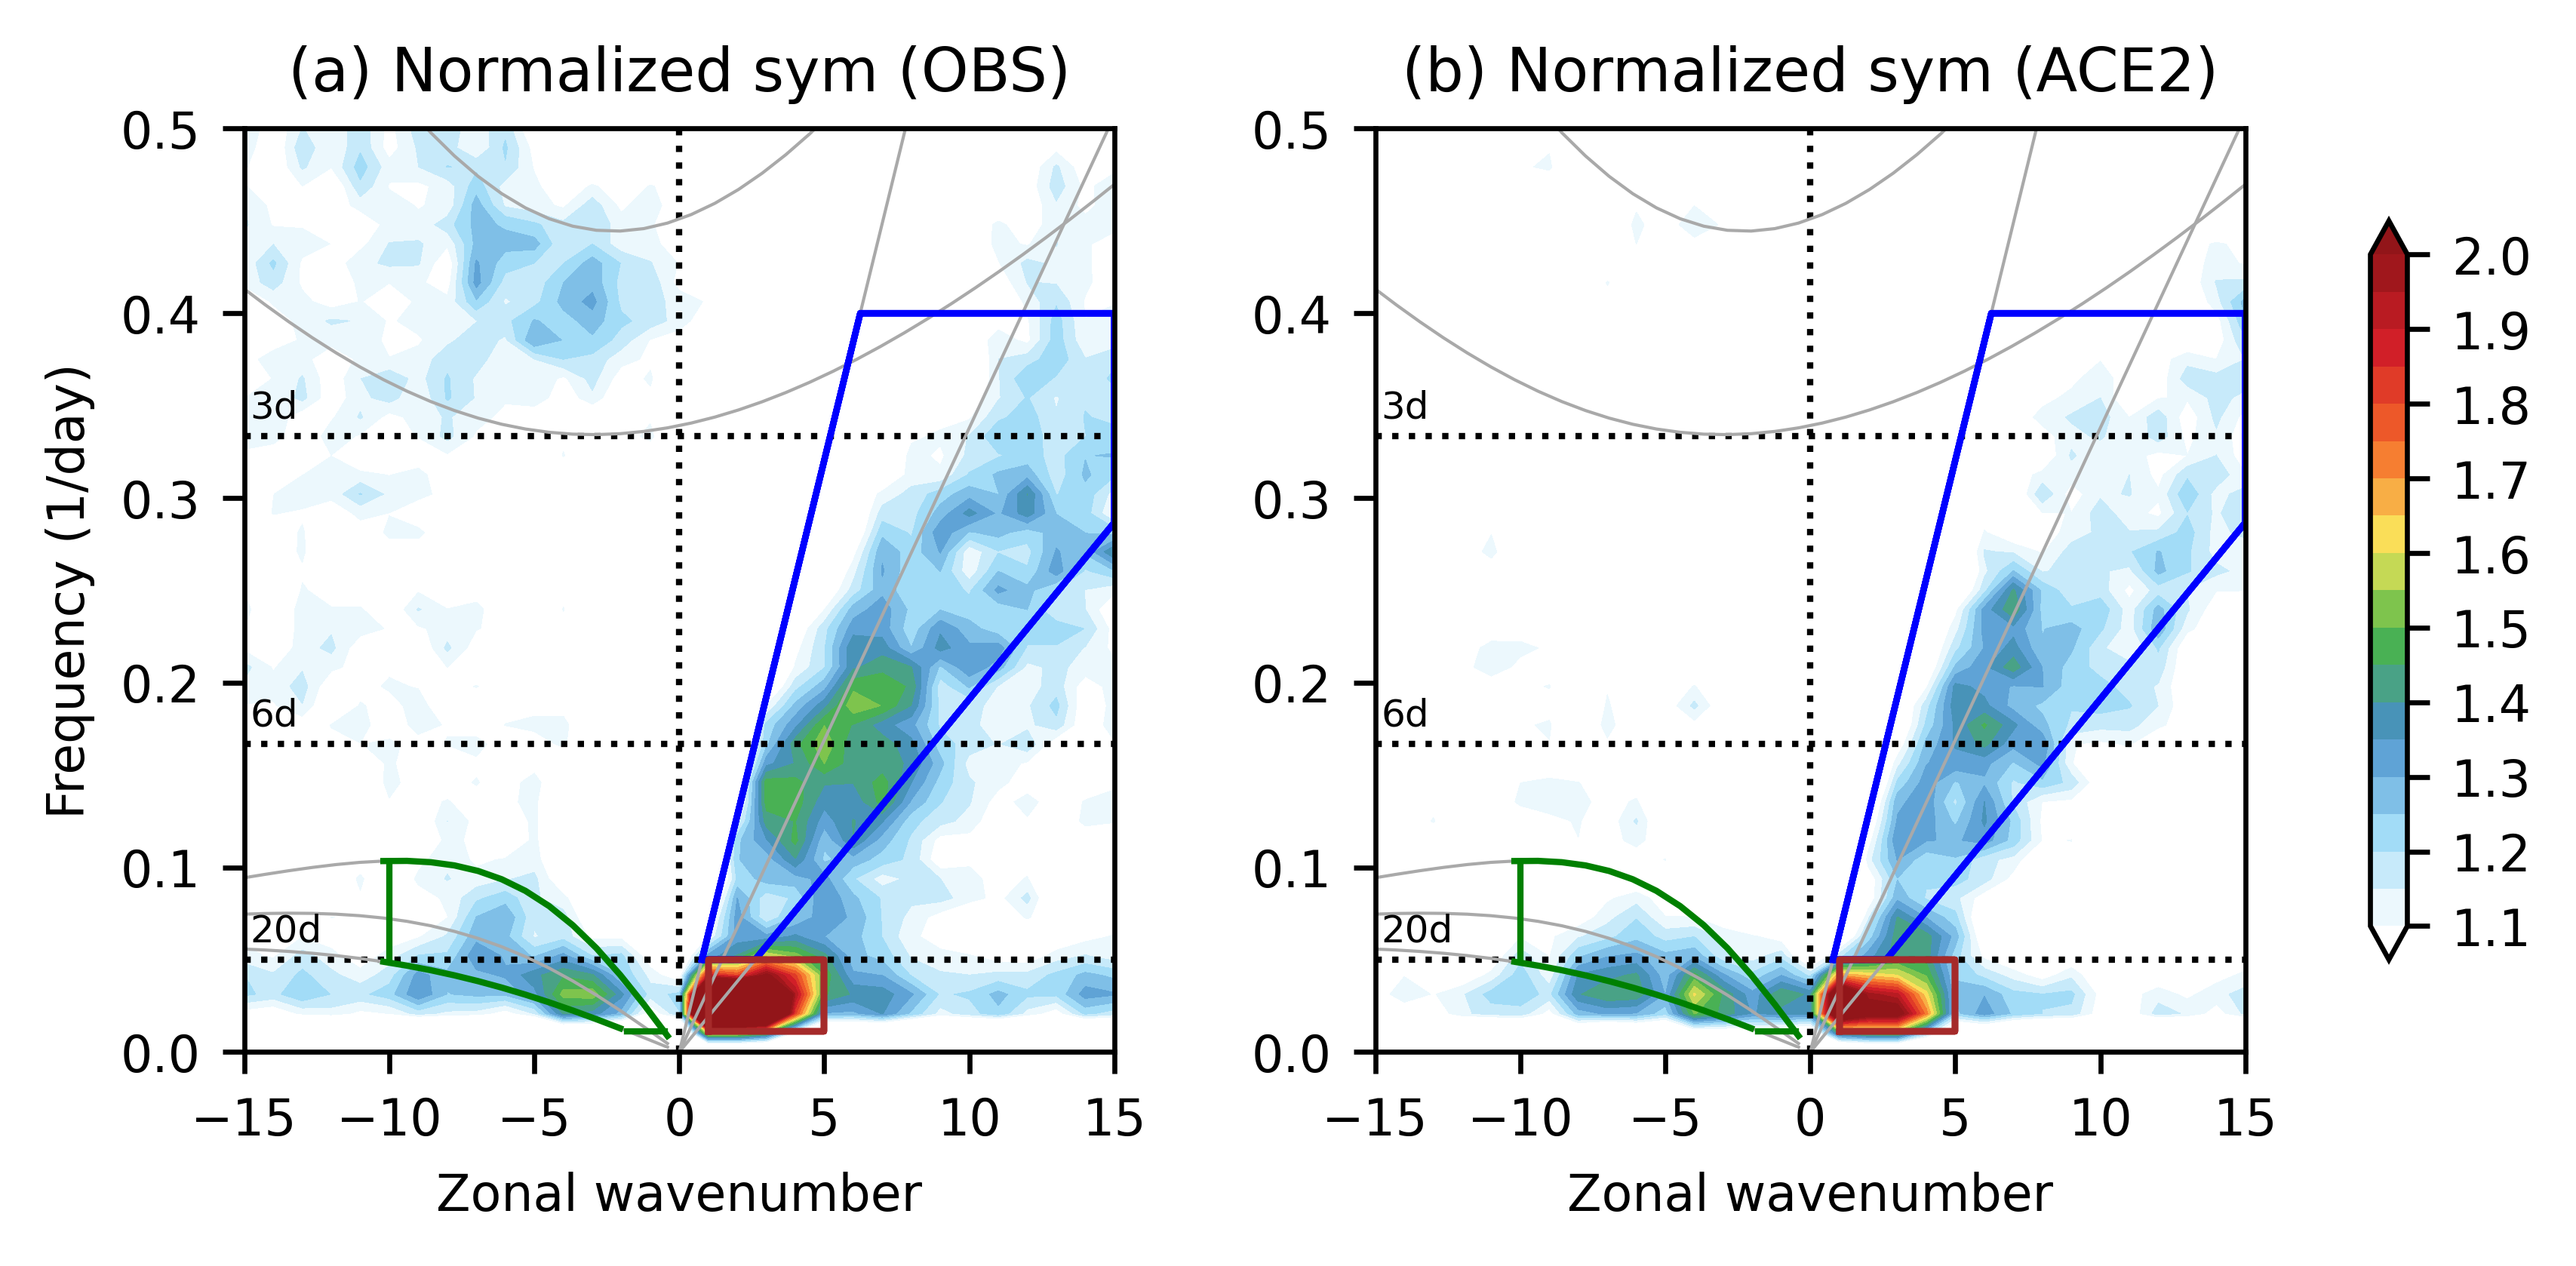

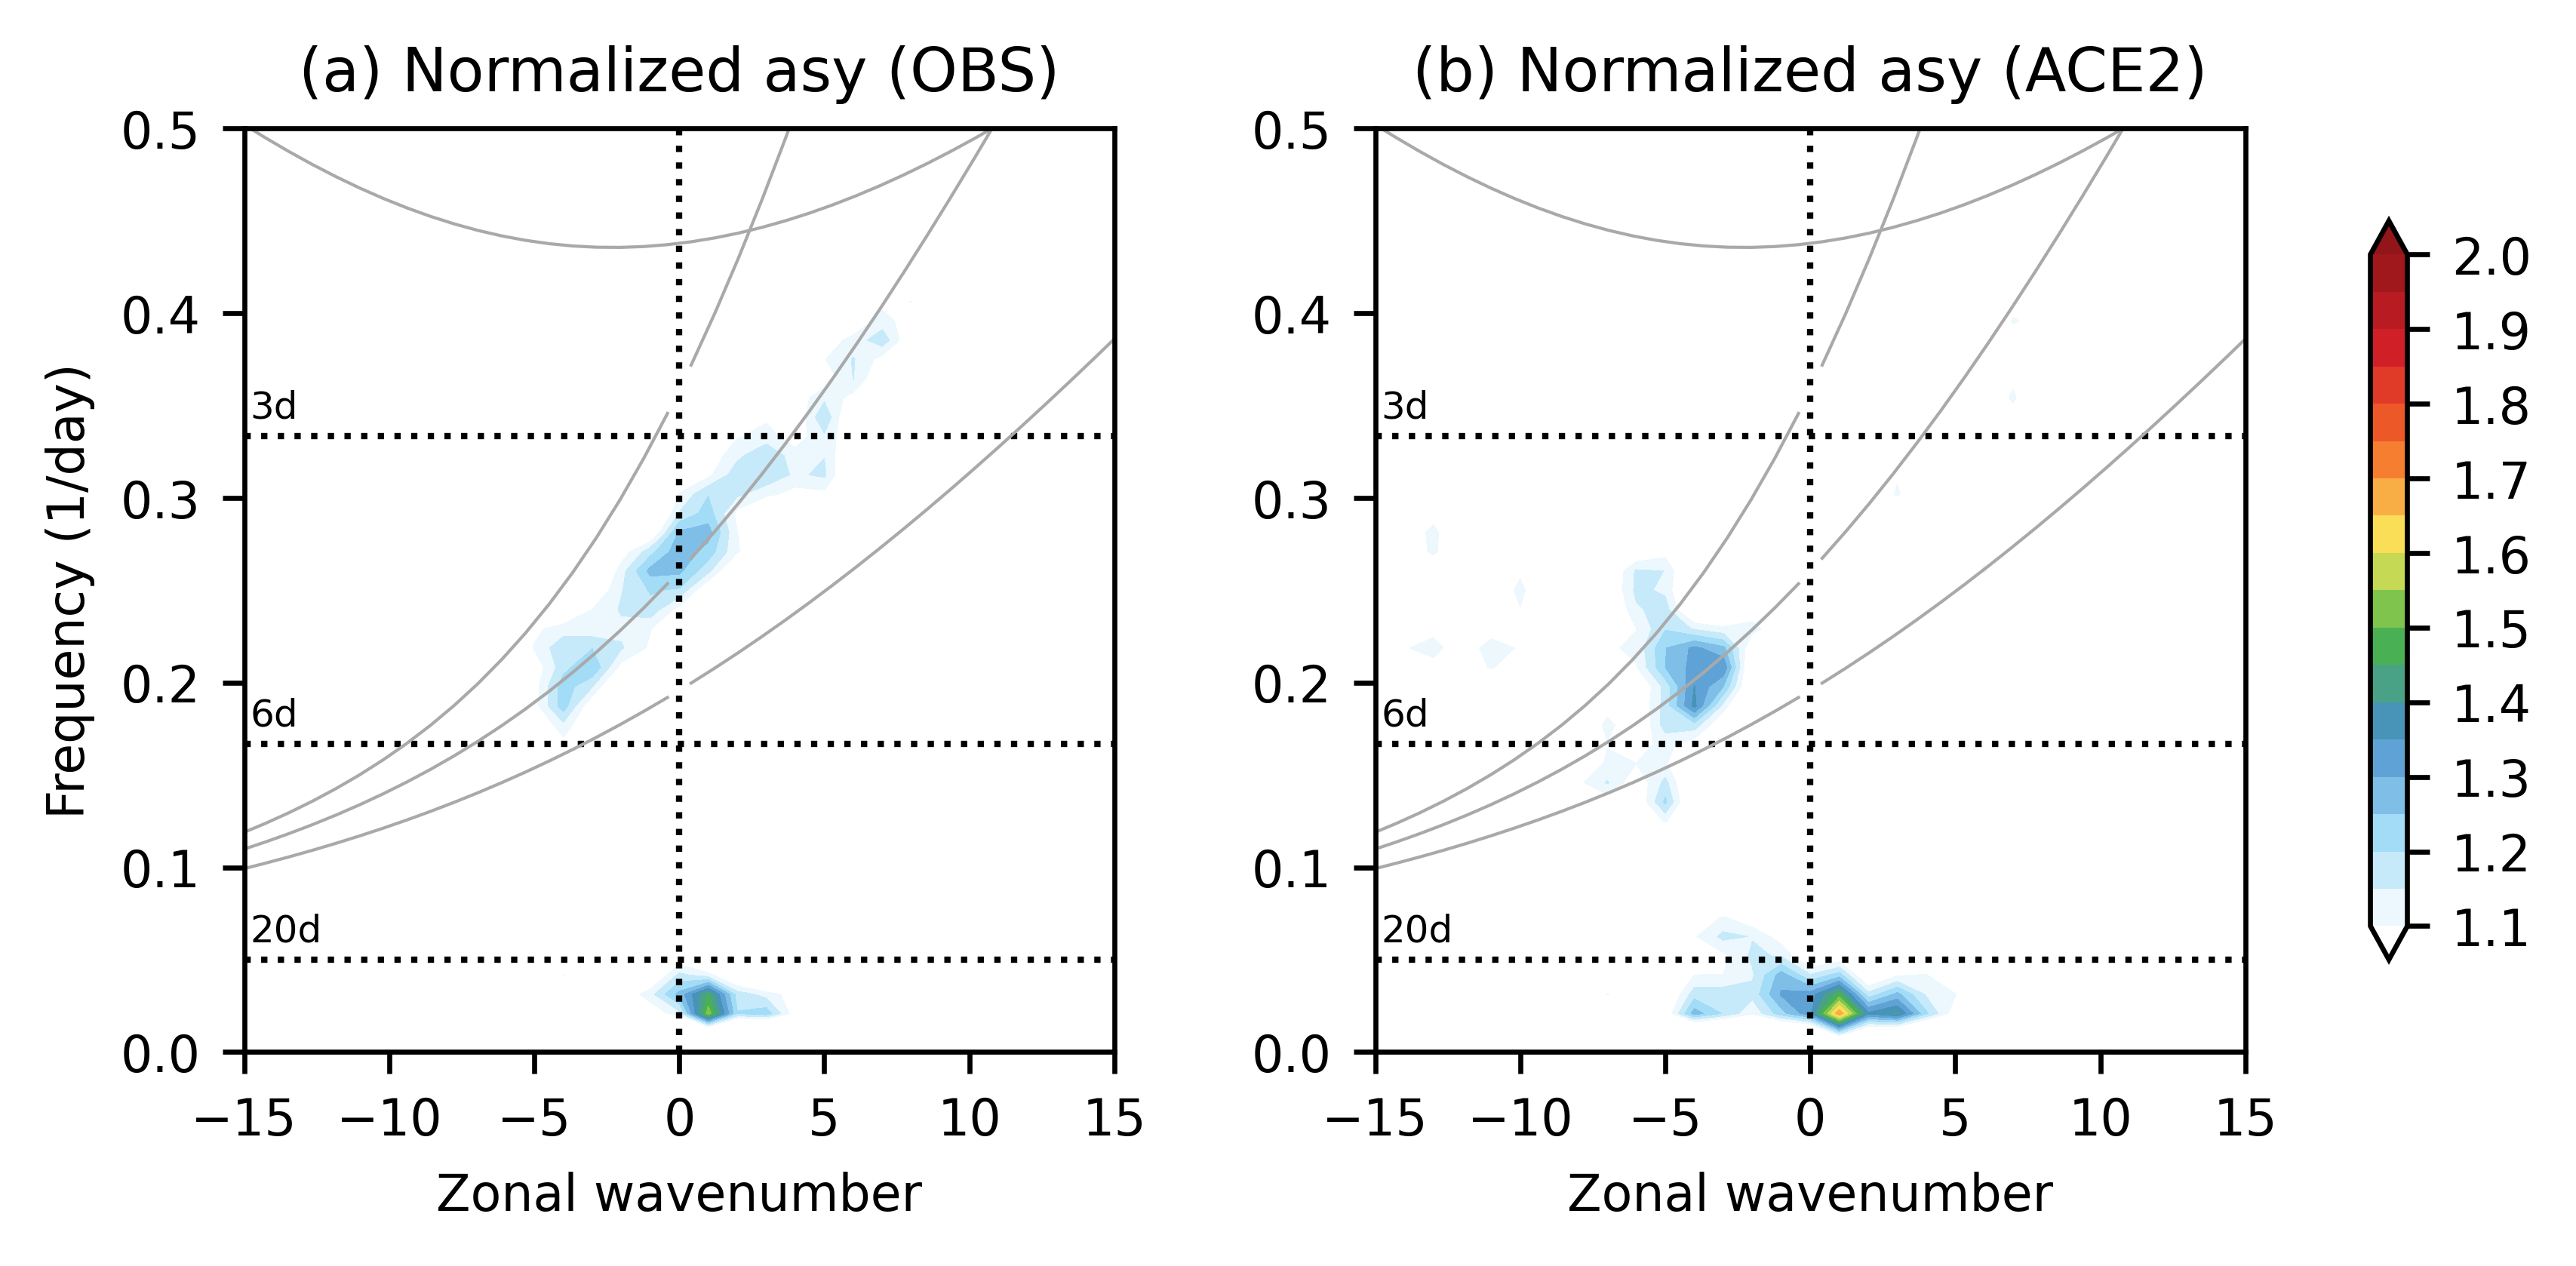

In [32]:
# Plot signal strength
d = np.array([3,6,20]) # mark 3, 6, 20 day in WK1999
dname = list(['3d','6d','20d'])
clev = np.arange(1.1, 2.05, 0.05)
cticks = np.arange(1.1, 2.1, 0.1)

sym_asy_list = list(['sym','asy'])
for sym_asy in range(0, 2):
    if sym_asy == 0:
        title = list(['(a) Normalized sym (OBS)','(b) Normalized sym (ACE2)'])
        vname = list(['r_sym_obs','r_sym_ace2'])
    else:
        title = list(['(a) Normalized asy (OBS)','(b) Normalized asy (ACE2)'])
        vname = list(['r_asy_obs','r_asy_ace2'])

    fig_name = 'Fig.8.normalized_power_spectrum_10yr_'+sym_asy_list[sym_asy]+'.png'
    fig, axes = plt.subplots(1,2,figsize=(6.5, 3),dpi=600)
    plt.rcParams.update({'font.size': 8})
    plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.3, hspace=0.5)
    for iplt in range(0, 2):
        plt.subplot(1, 2, iplt+1)
        ax = plt.gca()

        VAR = globals()[vname[iplt]]
        plt.contourf(x,y,VAR,cmap=cmaps.WhiteBlueGreenYellowRed,levels = clev,extend='both')
        if iplt == 1:
            cb = plt.colorbar(ax=axes,orientation = 'vertical',shrink=.8, aspect=20, pad=0.05)
            cb.set_ticks(cticks)
        # Mark 3, 6, 20 day period:
        for dd in range(0,np.size(d)):
            plt.plot([-15,15], [1/d[dd],1/d[dd]], 'k',linewidth=1, linestyle=':')
            plt.text(-14.8,1/d[dd]+0.01,dname[dd], fontsize=6)
        
        plt.title(title[iplt])

        # Mark zwnum == 0:
        plt.plot([0,0],[0,0.5],'k',linewidth=1,linestyle=':')#'dashed')
        plt.xlim([-15,15])
        plt.ylim([0,0.5])
        plt.xticks(np.arange(-15,20,5))
        plt.xlabel('Zonal wavenumber')
        if iplt == 0 or iplt == 3:
            plt.ylabel('Frequency (1/day)')

        swfreq,swwn = ATM.genDispersionCurves()
        # swfreq.shape # -->(6, 3, 50)
        swf = np.where(swfreq == 1e20, np.nan, swfreq)
        swk = np.where(swwn == 1e20, np.nan, swwn)
        c = 'darkgray' # COLOR FOR DISPERSION LINES/LABELS
        
        if sym_asy == 0:
            ii_st = 3
            ii_end = 6
        elif sym_asy == 1:
            ii_st = 0
            ii_end = 3
        else:
            ii_st = 0
            ii_end = 0

        for ii in range(ii_st, ii_end):
            ax.plot(swk[ii, 0,:], swf[ii,0,:], color=c, linewidth=0.5)
            ax.plot(swk[ii, 1,:], swf[ii,1,:], color=c, linewidth=0.5)
            ax.plot(swk[ii, 2,:], swf[ii,2,:], color=c, linewidth=0.5)
        #ax.axvline(0, linestyle='dashed', color='lightgray')

        # Plot band for each wave
        he = np.array([8, 25, 90])
        s2d = 86400
        re = 6371*1000
        g = 9.8

        ##################
        # CCKW band
        s_min = (g*he[0])**0.5/(2*np.pi*re)*s2d #slope of he = 8m
        s_max = (g*he[2])**0.5/(2*np.pi*re)*s2d #slope of he = 90m
        kw_tmax_list = np.array([8,7,4])
        kw_tmax = 20
        fmax = 0.4
        kw_x = np.array([1/kw_tmax/s_max, 1/kw_tmax/s_min,     15,  15, fmax/s_max, 1/kw_tmax/s_max])
        kw_y = np.array([1/kw_tmax,             1/kw_tmax,  15*s_min, fmax,      fmax,  1/kw_tmax])

        ########################
        # 3. MJO band
        mjo_x = np.array([1,      5,      5,  1,  1 ])
        mjo_y = np.array([1/90, 1/90,  1/20, 1/20, 1/90])
        ############################################################## 

        if sym_asy == 0:
            # Mark CCKW band:
            for kk in range(0,np.size(kw_x)):
                plt.plot(kw_x,kw_y,'b',linewidth=1,linestyle='solid')

            # Mark MJO box
            for imjo in range(0,np.size(mjo_x)):
                plt.plot(mjo_x,mjo_y,'brown',linewidth=1,linestyle='solid')

            # Mark ER box
            swk_er1 = swk[3, 1, :]
            swk_er2 = swk[3, 2, :]
            swf_er1 = swf[3, 1, :]
            swf_er2 = swf[3, 2, :]
            swwn_er1 = swwn[3, 1, :]
            swwn_er2 = swwn[3, 2, :]
            swfreq_er1 = swfreq[3, 1, :]
            swfreq_er2 = swfreq[3, 2, :]
            swk_er1 = np.where(swwn_er1<-10.5, np.nan, swk_er1)
            swk_er2 = np.where(swwn_er2<-10.5, np.nan, swk_er2)
            swf_er1 = np.where(swfreq_er1<1/100, np.nan, swf_er1 )
            swf_er2 = np.where(swfreq_er2<1/115, np.nan, swf_er2 )
            plt.plot(swk_er1, swf_er1, color='g',linewidth=1)
            plt.plot(swk_er2, swf_er2, color='g',linewidth=1)
            plt.plot([-10,-10],[0.103,0.05],'g',linewidth=1)
            plt.plot([-1.8,-0.5],[1/90,1/90],'g',linewidth=1)
            ########################################
        
    plt.savefig(fig_dir + fig_name,format='png', dpi=600)
    plt.show()